In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import scanpy as sc
import decoupler as dc
import plotnine as p9
import liana as li
import pandas as pd

from liana.method import MistyData, genericMistyData, lrMistyData
from liana.method.sp import RandomForestModel, LinearModel, RobustLinearModel

In [2]:
out_dir = '../../results/05_fibroblast/10_misty'
os.makedirs(out_dir, exist_ok=True)

In [3]:
sample_list = ['HC01', 'HC02', 'HC03', 'HC05',
               'SSc4994', 
               'SSc5380', 
                'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
                'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35']

In [5]:
def run_misty(sample, sel_cell_types, out_dir):
    adata = sc.read_h5ad(f'../../results/spatial/filtered_data/{sample}.h5ad')
    
    # read cell state score
    adata.obsm['cell_state_score'] = pd.read_csv(f'../../results/05_fibroblast/06_cell_state_score/{sample}_score.csv', index_col=0)
    
    # read cell proportion
    adata.obsm['cell_proportion'] = pd.read_csv(f'../../results/04_spatial/09_run_cell2location/{sample}.csv', index_col=0)
    adata.obsm['cell_proportion'] = adata.obsm['cell_proportion'][sel_cell_types]
    
    cell_state_score = li.ut.obsm_to_adata(adata, 'cell_state_score')
    cell_proportion = li.ut.obsm_to_adata(adata, 'cell_proportion')
    
    misty = genericMistyData(intra=cell_state_score, 
                             extra=cell_proportion, 
                             cutoff=0, bandwidth=100, n_neighs=6)
    
    misty(model=RandomForestModel, n_jobs=-1, verbose = True)
    misty.write_h5mu(f'{out_dir}/{sample}_cell_type.h5mu')
    misty.uns['interactions'].to_csv(f'{out_dir}/{sample}_cell_type.csv')
    
    return misty

In [6]:
sel_cell_types = ['B cells', 'Endothelial', 'Keratinocytes', 'Langerhans cells',
                  'Macrophages', 'Mast cells', 'Melanocytes', 'Monocytes', 'NK cells',
                  'Neural', 'Pericytes', 'Plasma cells', 'Smooth Muscle', 'T cells', 'cDC', 'pDC']

sel_cell_types = ['B cells', 'Endothelial', 'Langerhans cells',
                  'Macrophages', 'Mast cells', 'Melanocytes', 'Monocytes', 'NK cells',
                  'Neural', 'Pericytes', 'Plasma cells', 'Smooth Muscle', 'T cells', 'cDC', 'pDC']

Now learning: Fib9: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


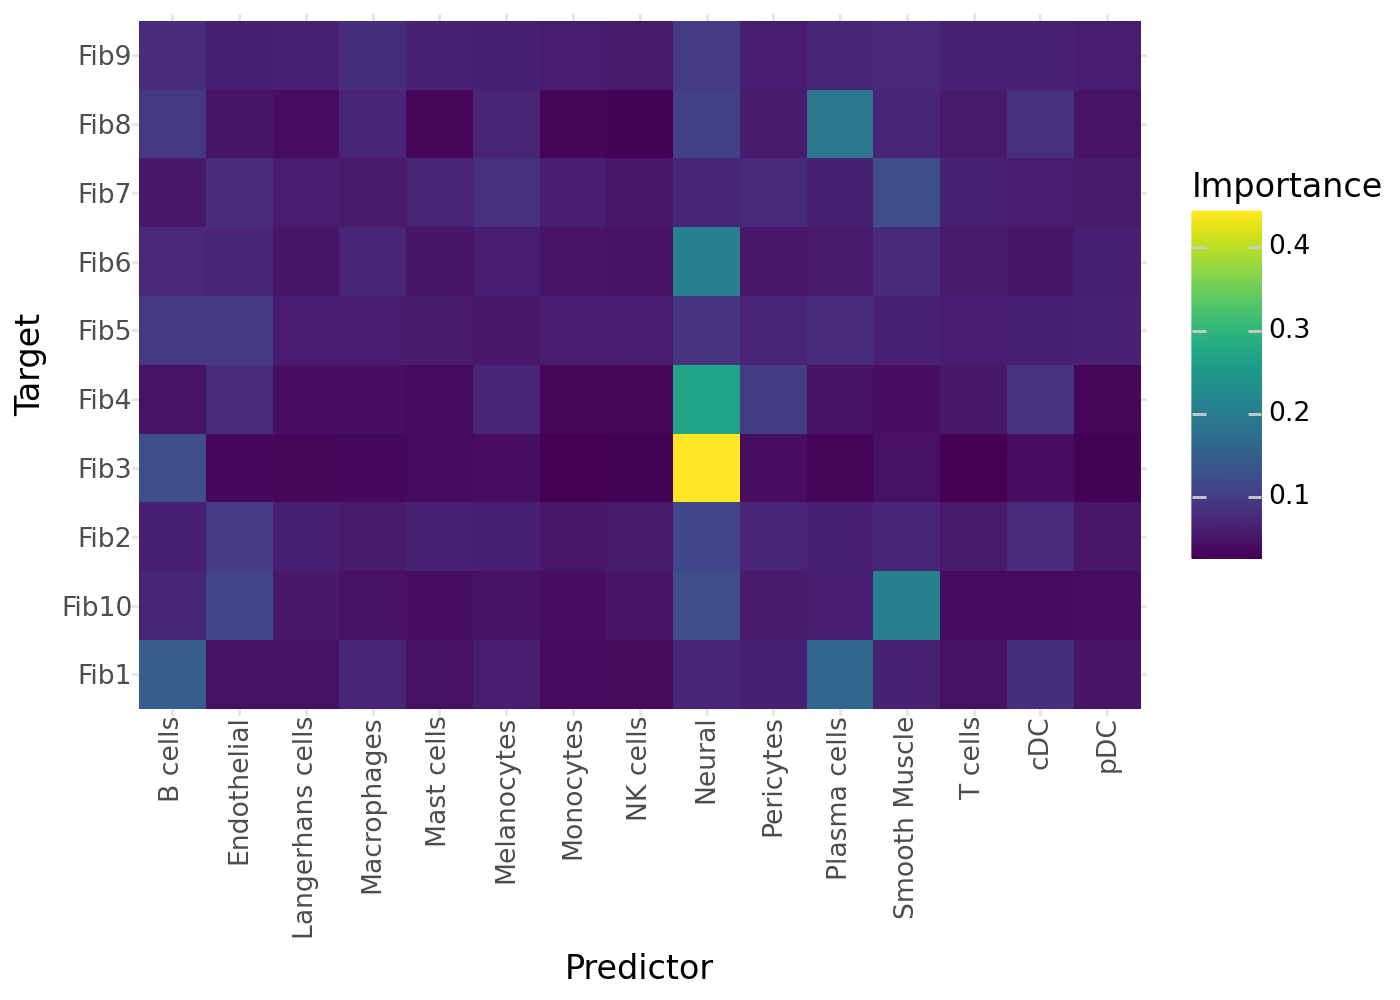

In [7]:
misty = run_misty('HC01', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


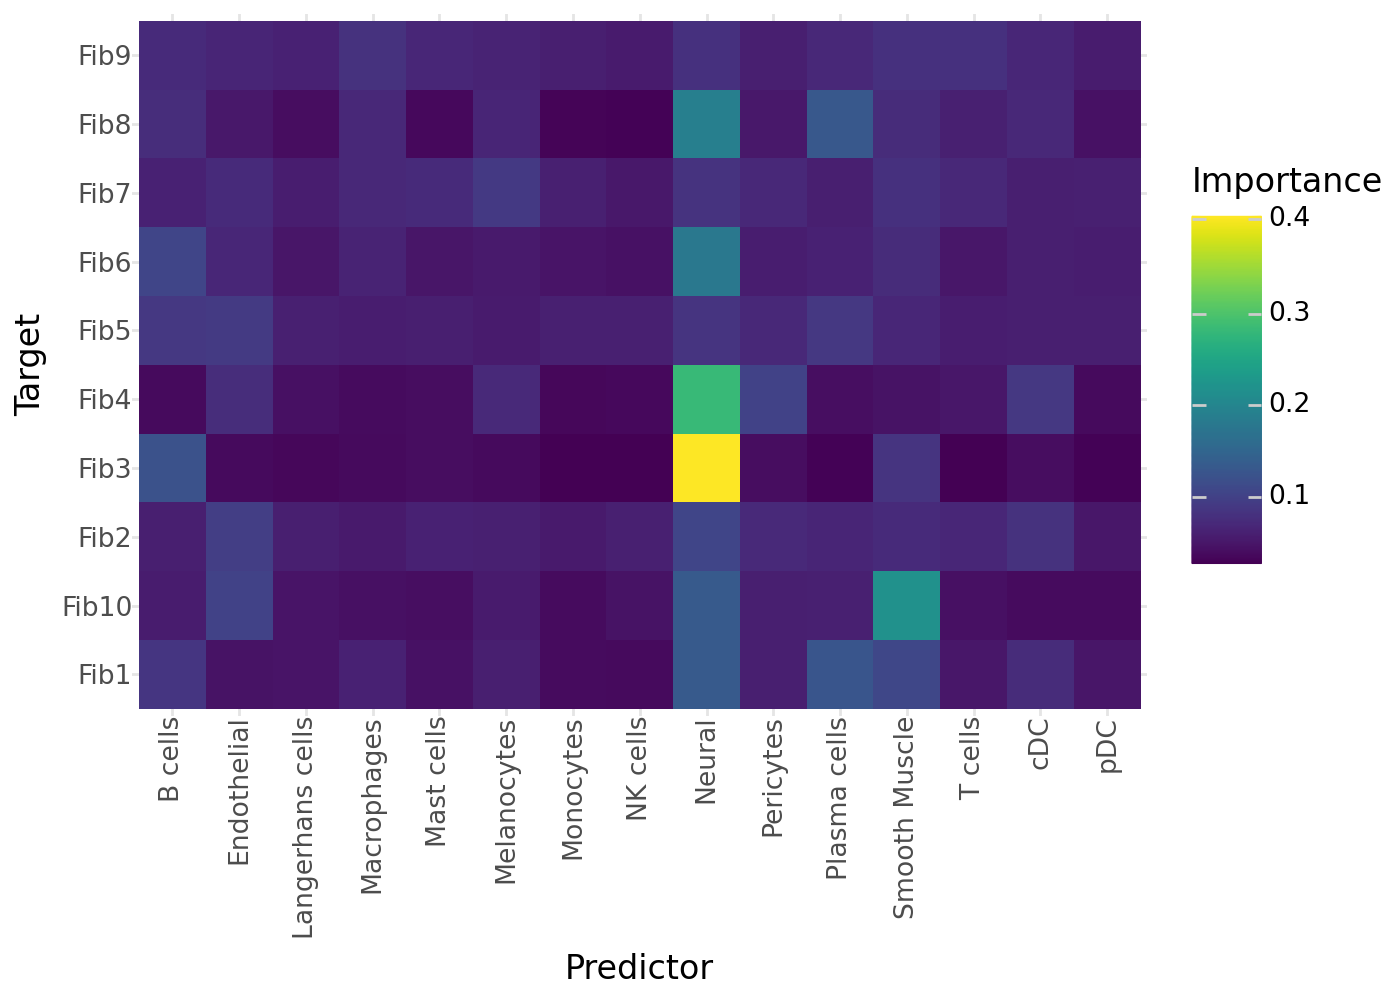

In [8]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:12<00:00,  1.21s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


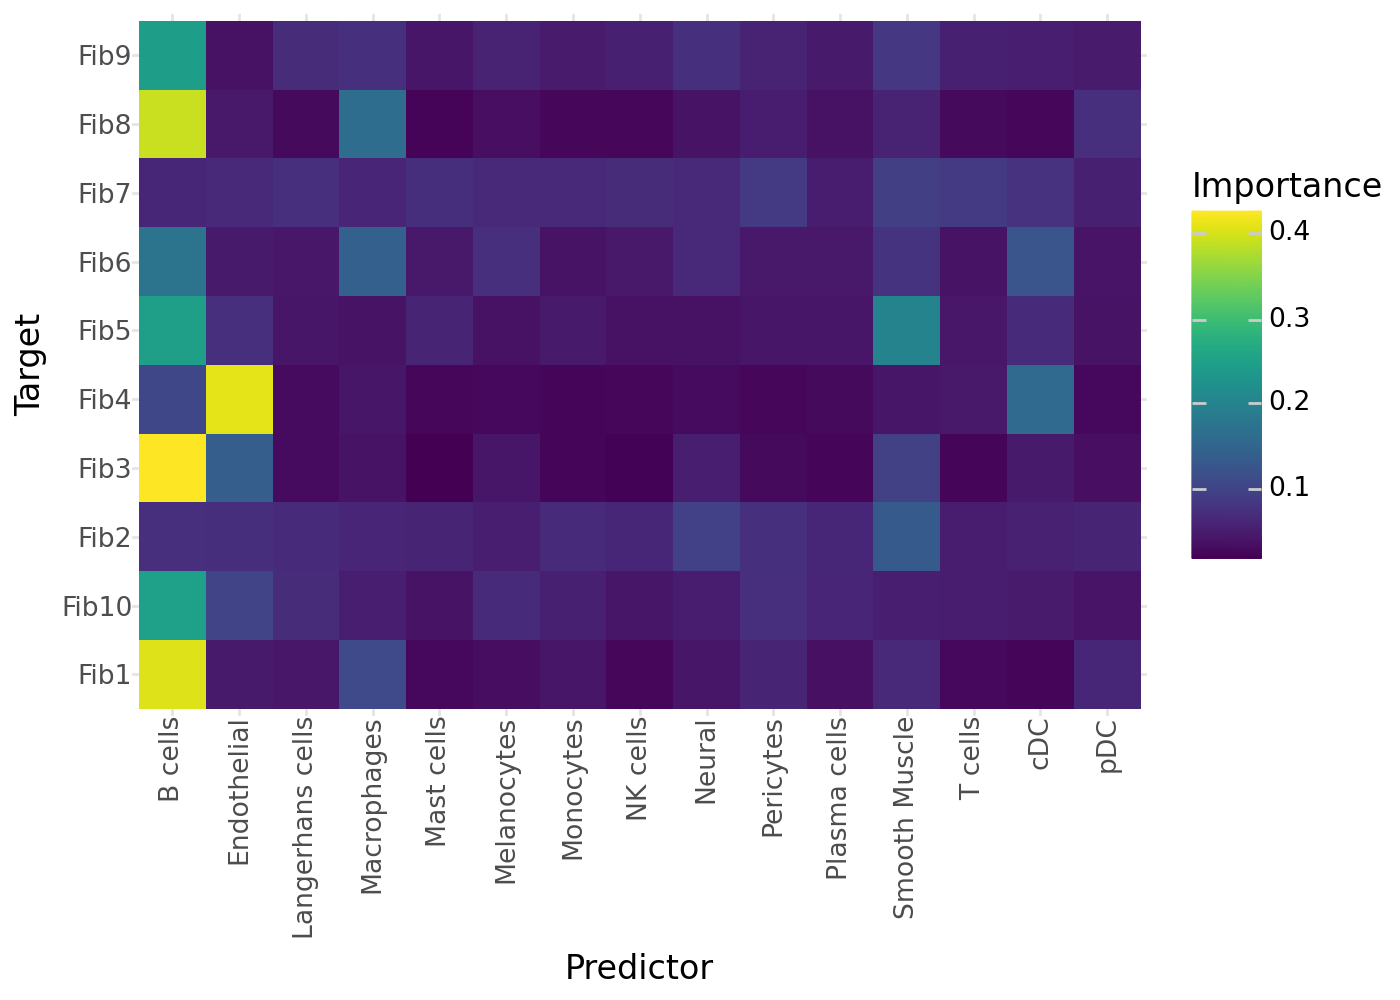

In [9]:
misty = run_misty('HC02', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


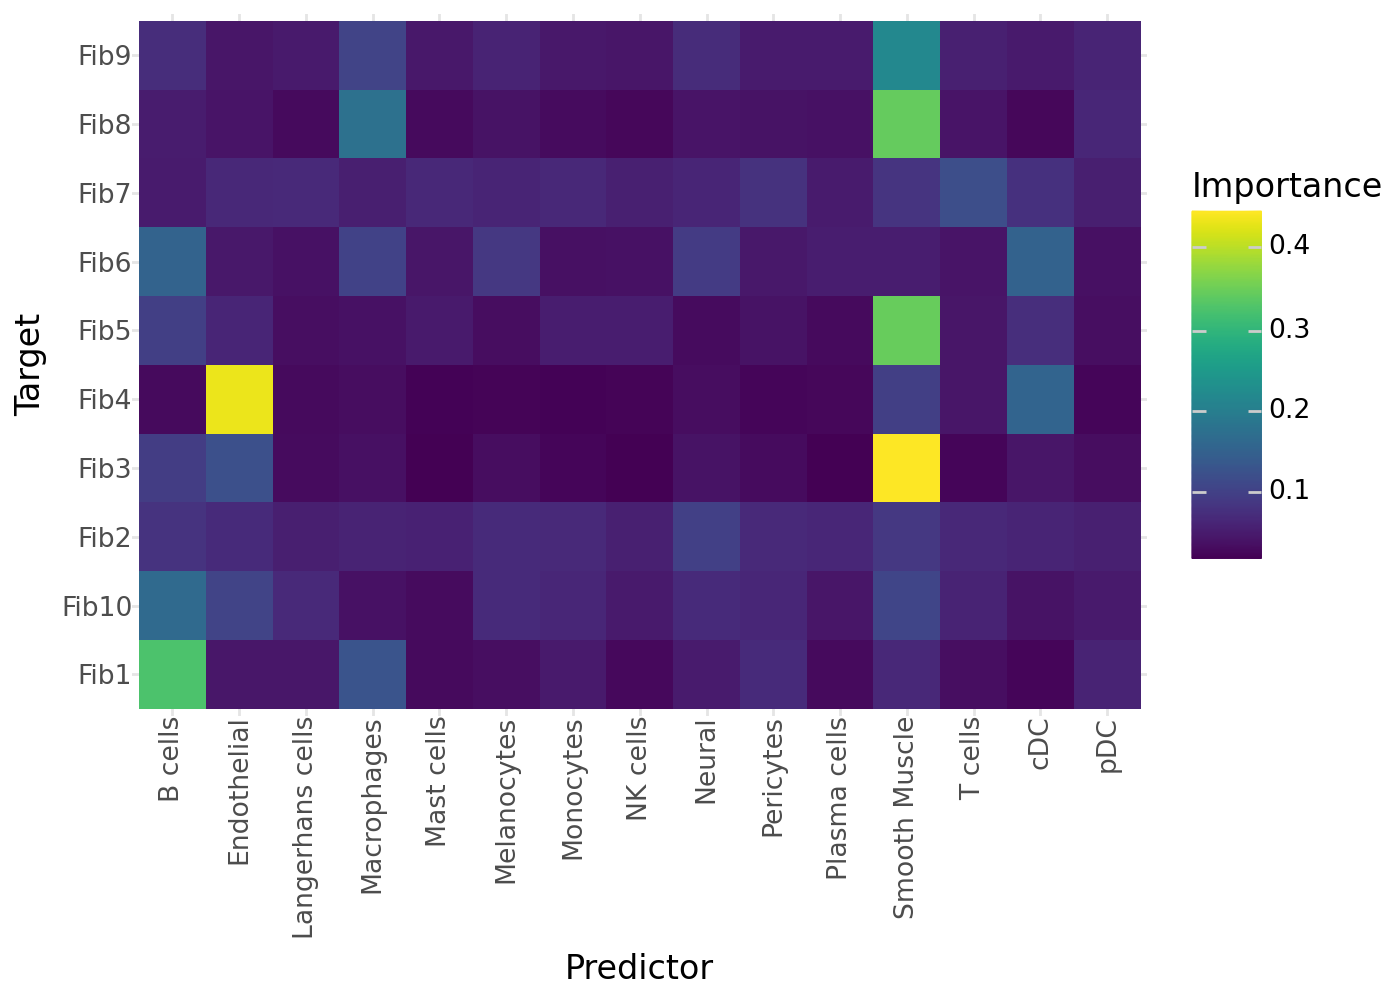

In [10]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


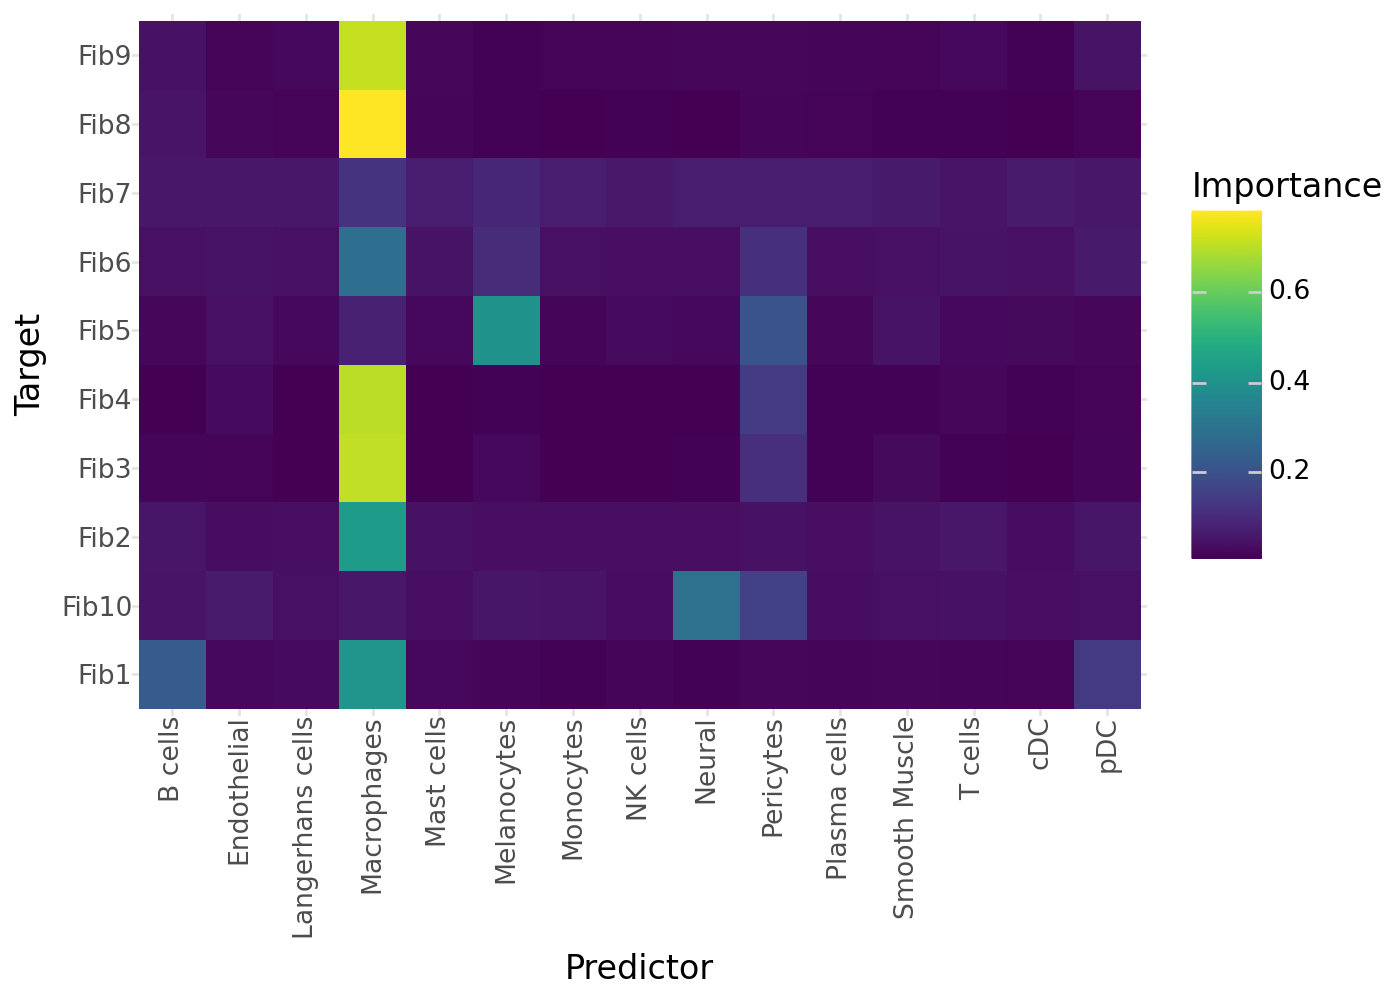

In [11]:
misty = run_misty('HC03', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


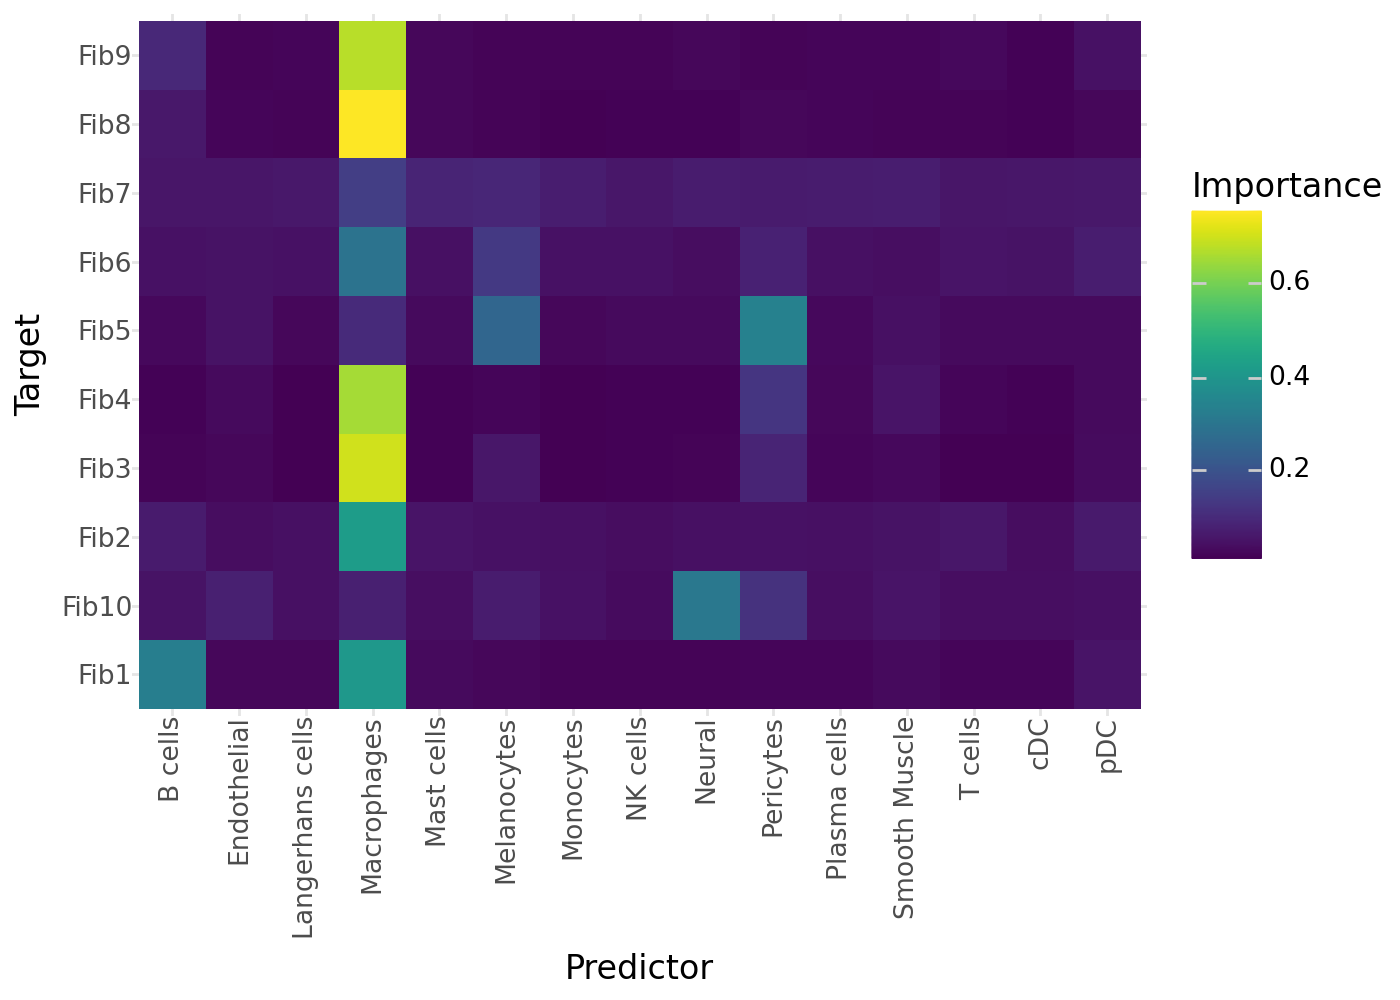

In [12]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:12<00:00,  1.20s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


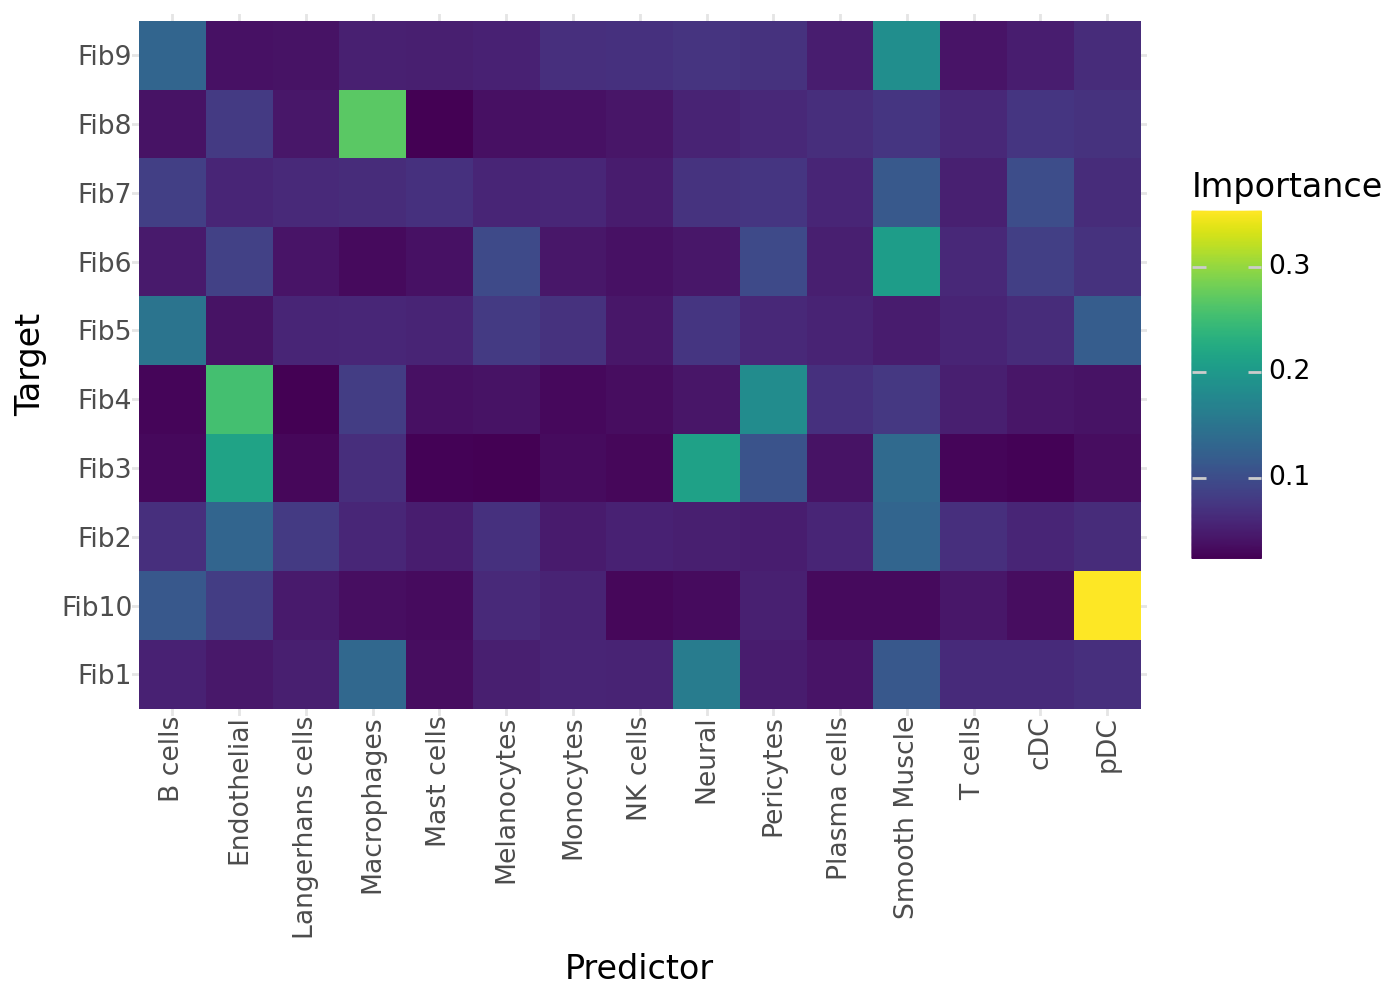

In [13]:
misty = run_misty('HC05', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


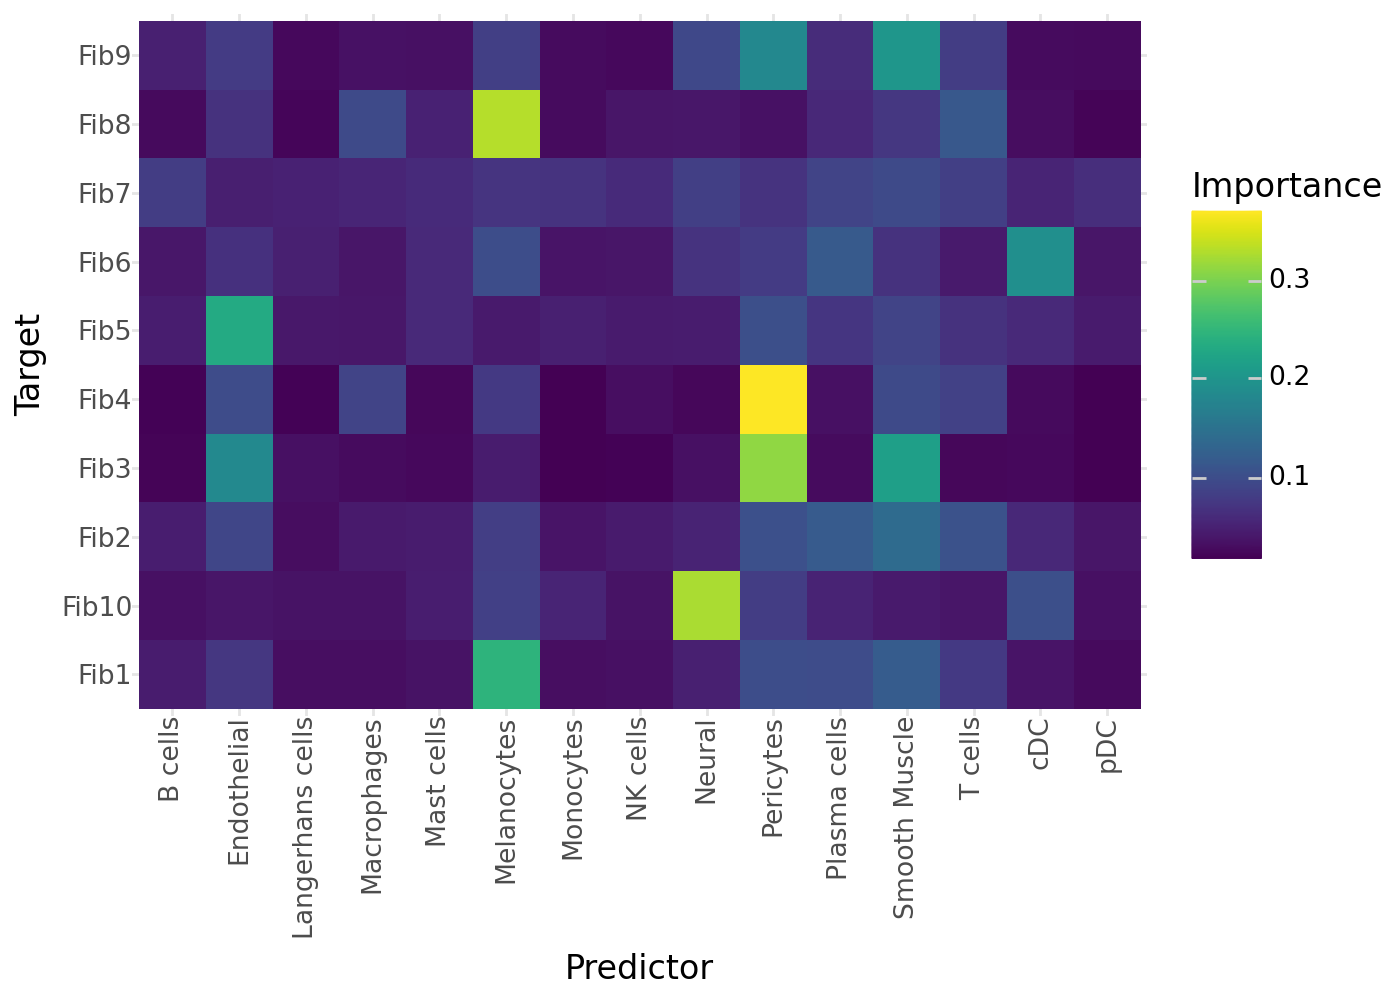

In [14]:
misty = run_misty('SSc4994', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


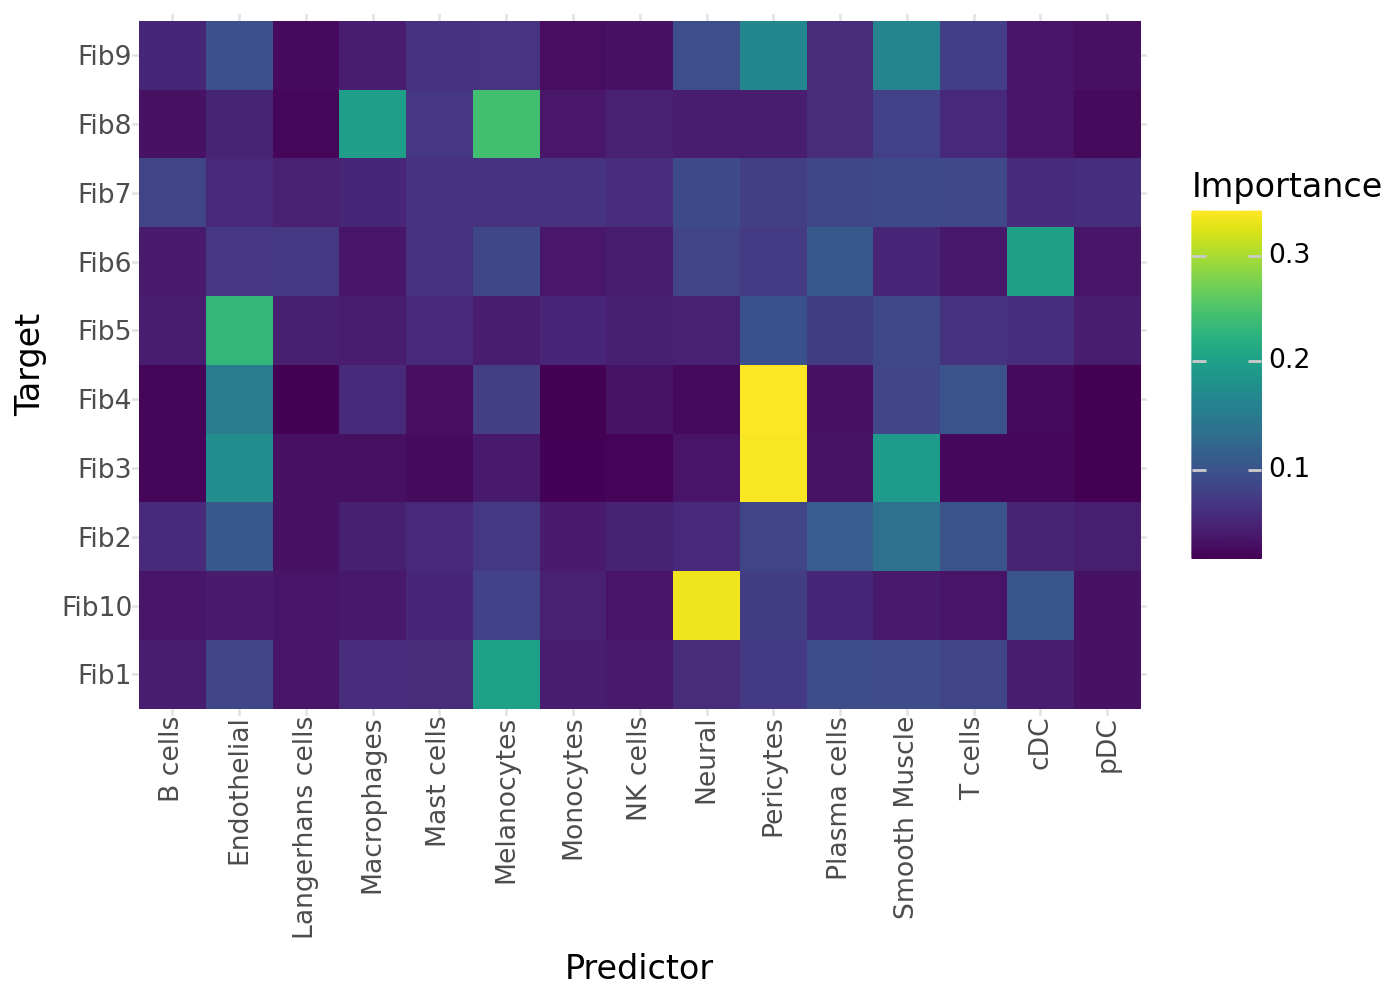

In [15]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


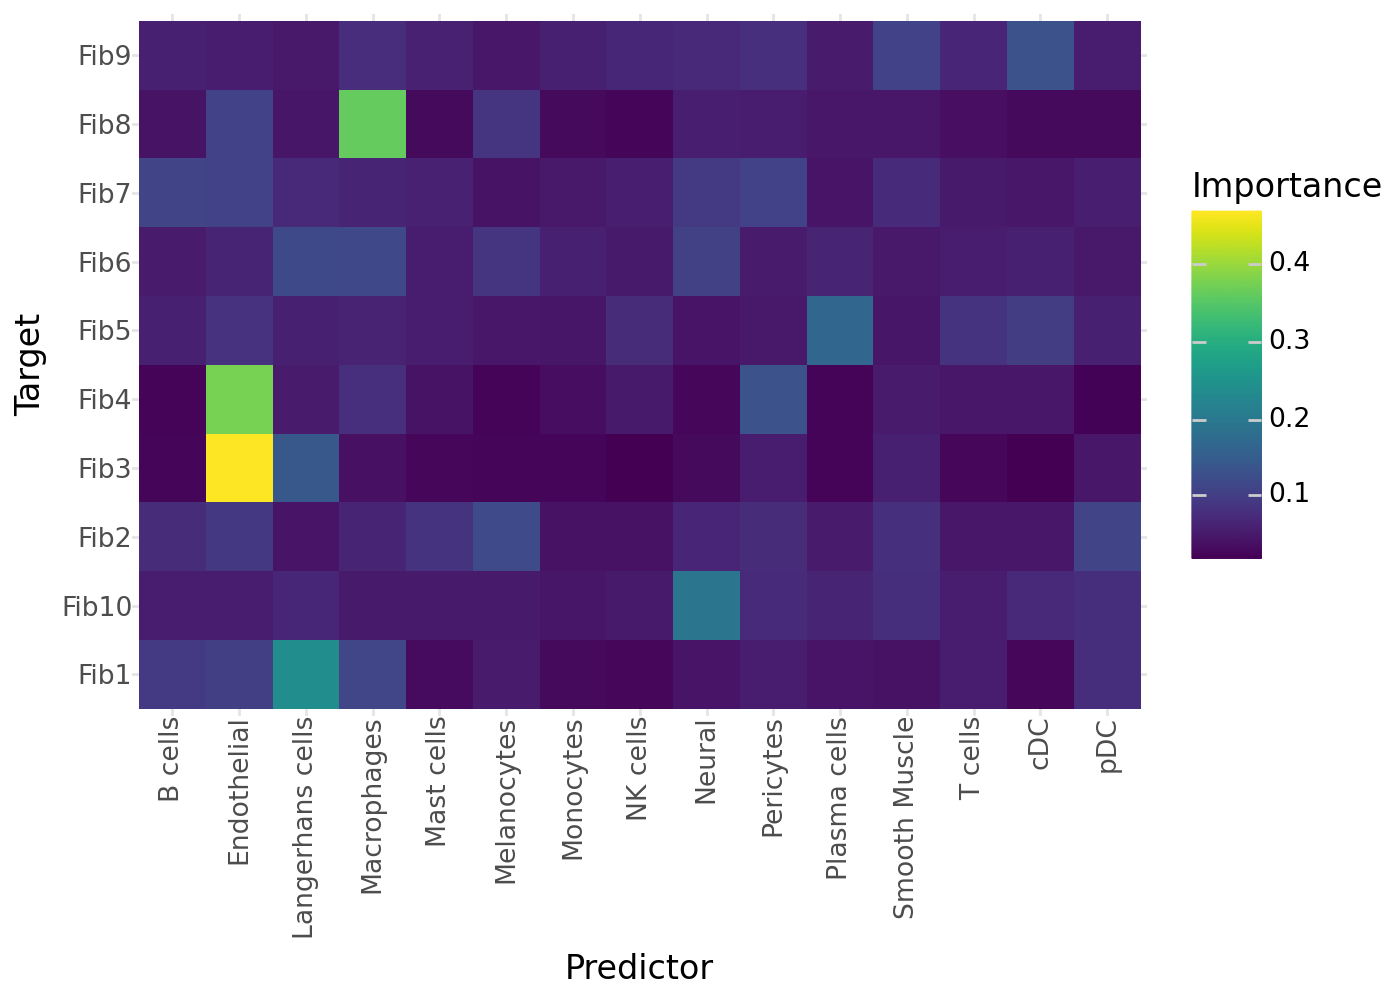

In [16]:
misty = run_misty('SSc5380', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


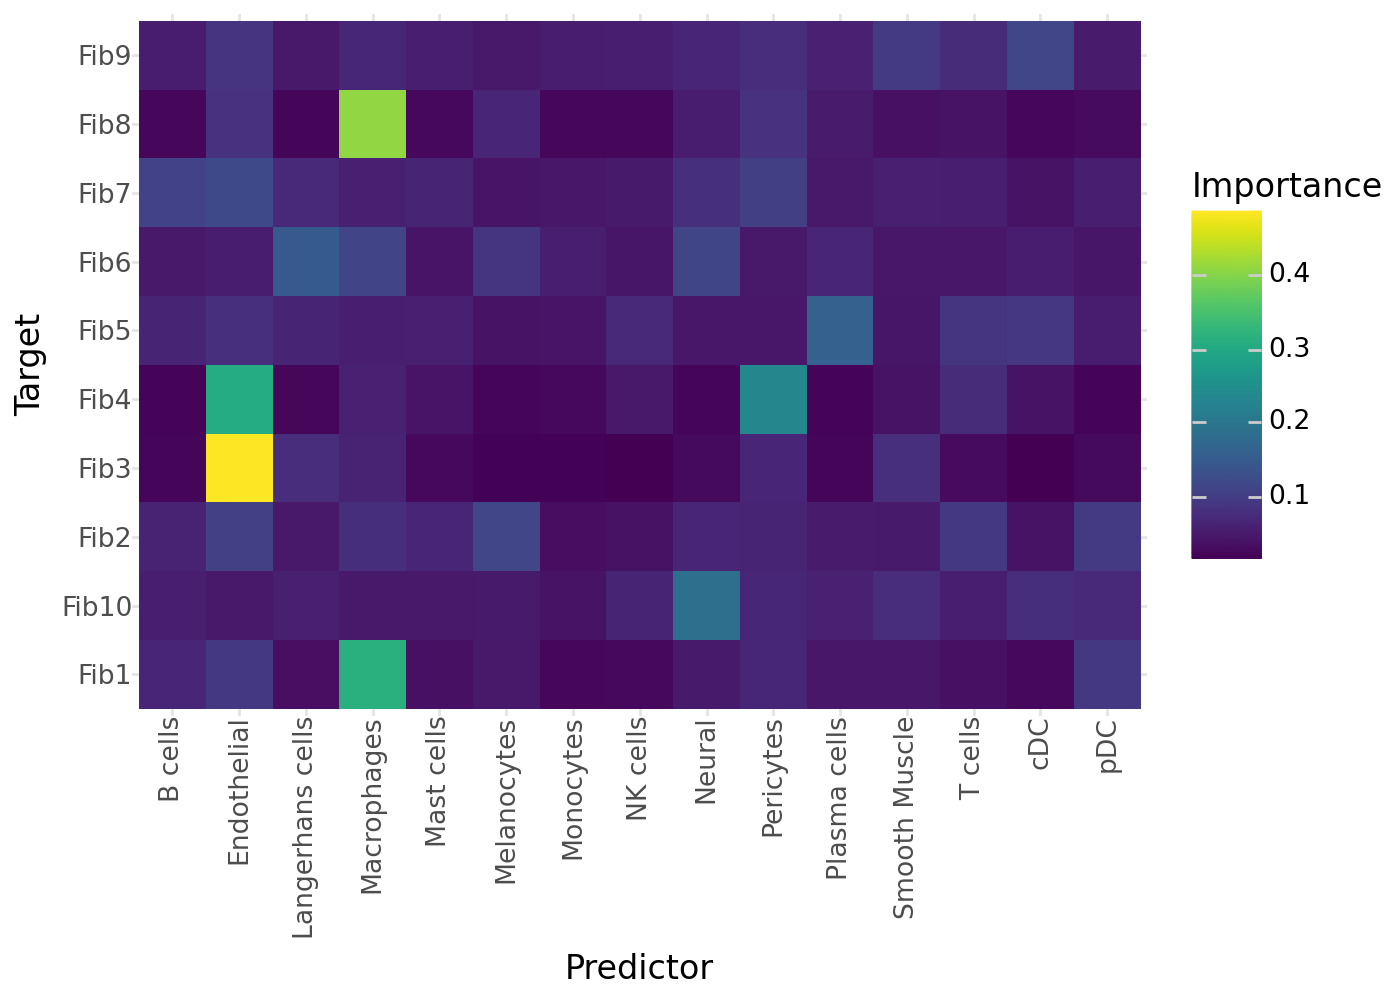

In [17]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


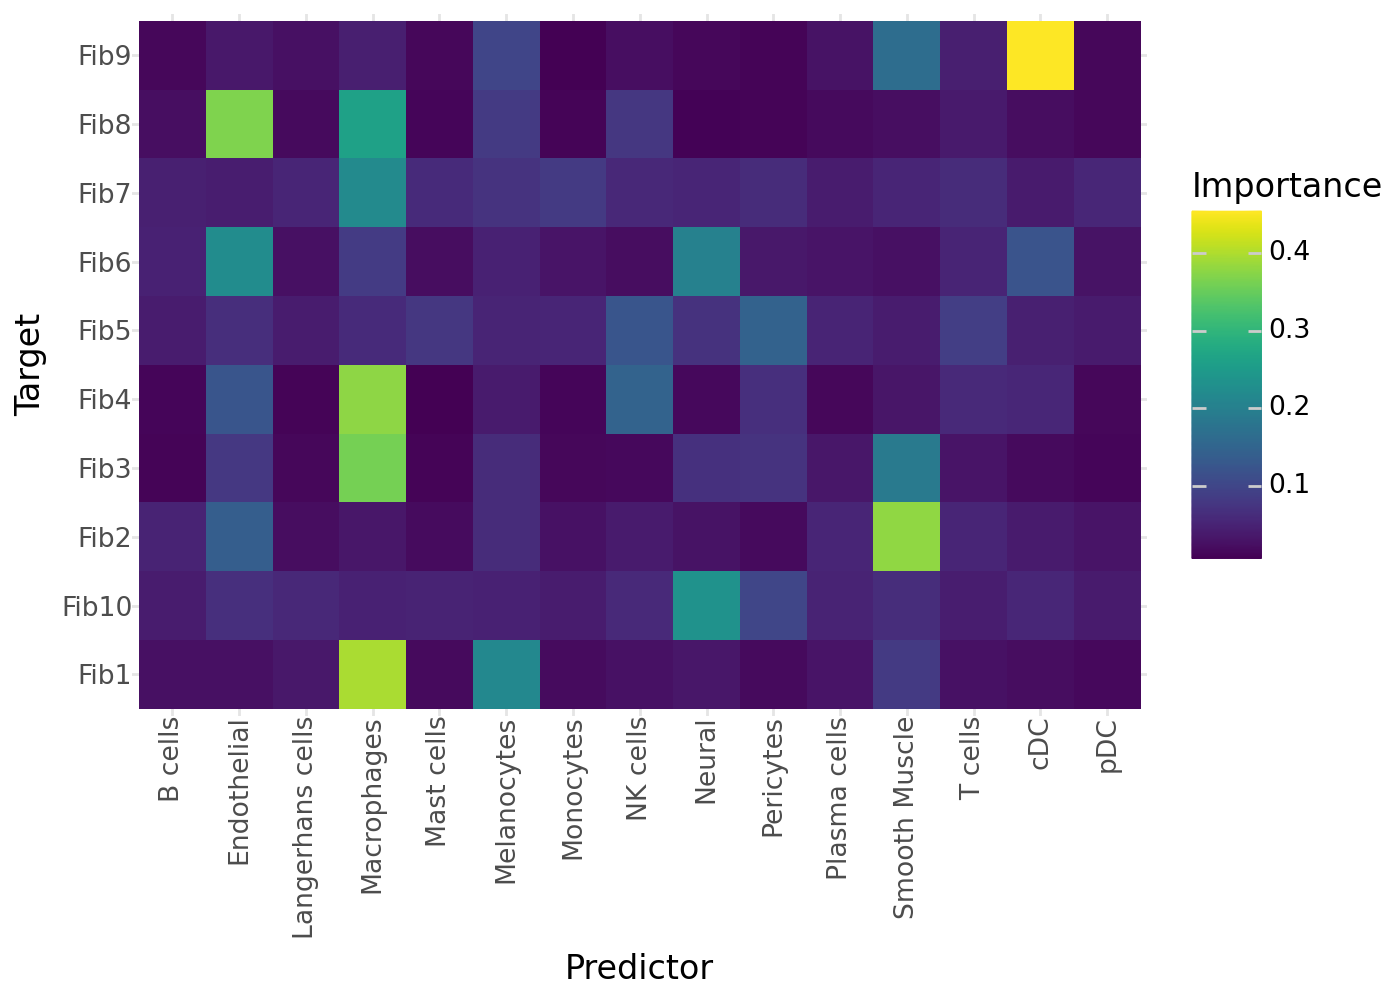

In [18]:
misty = run_misty('SSc-HL01', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


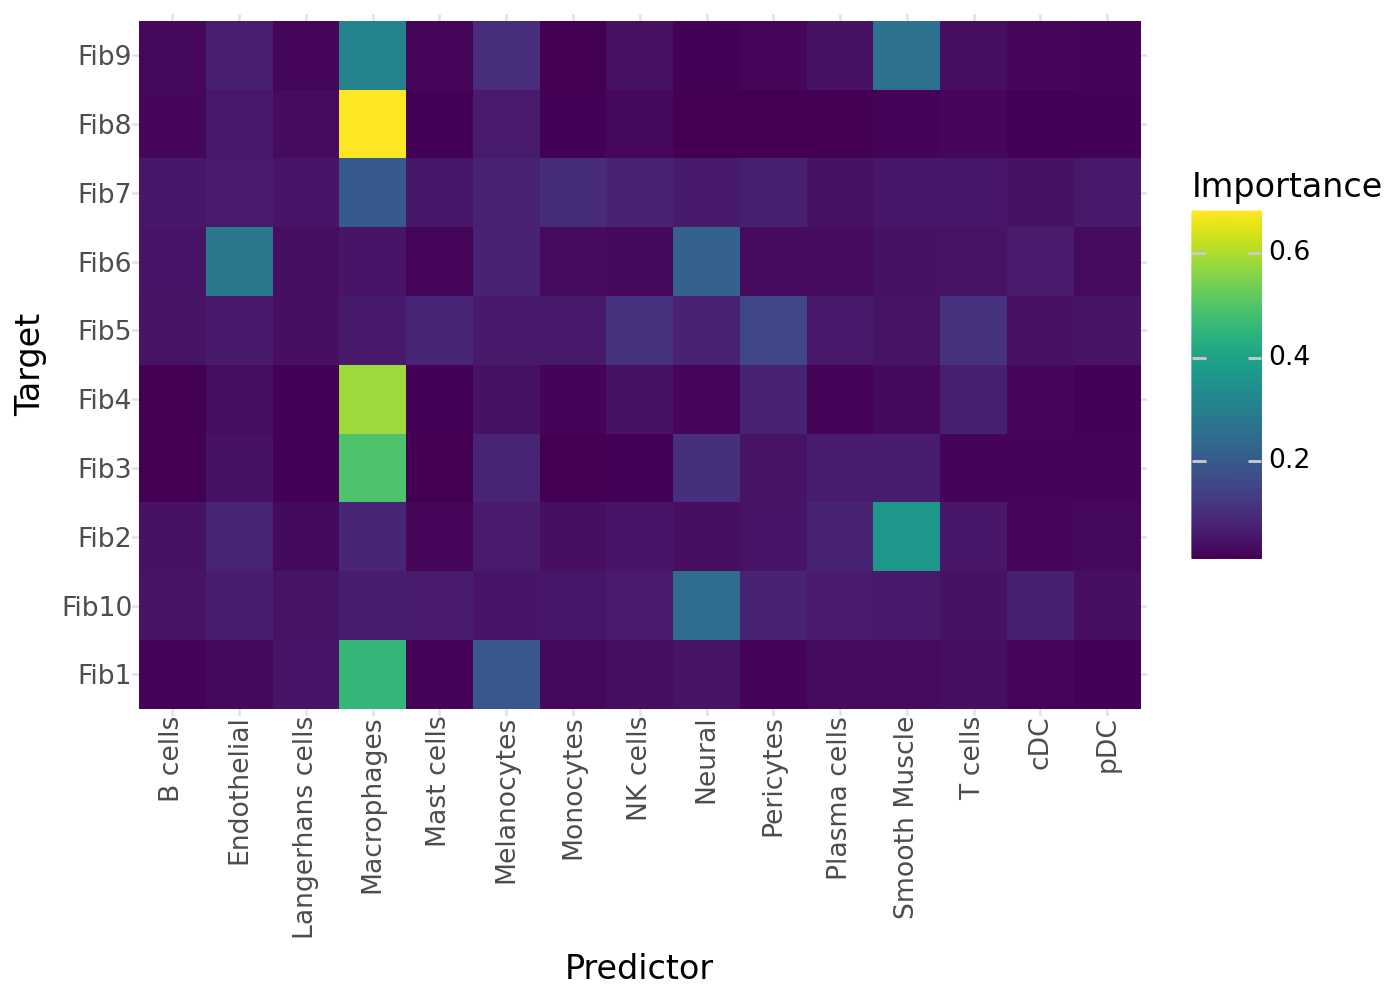

In [19]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


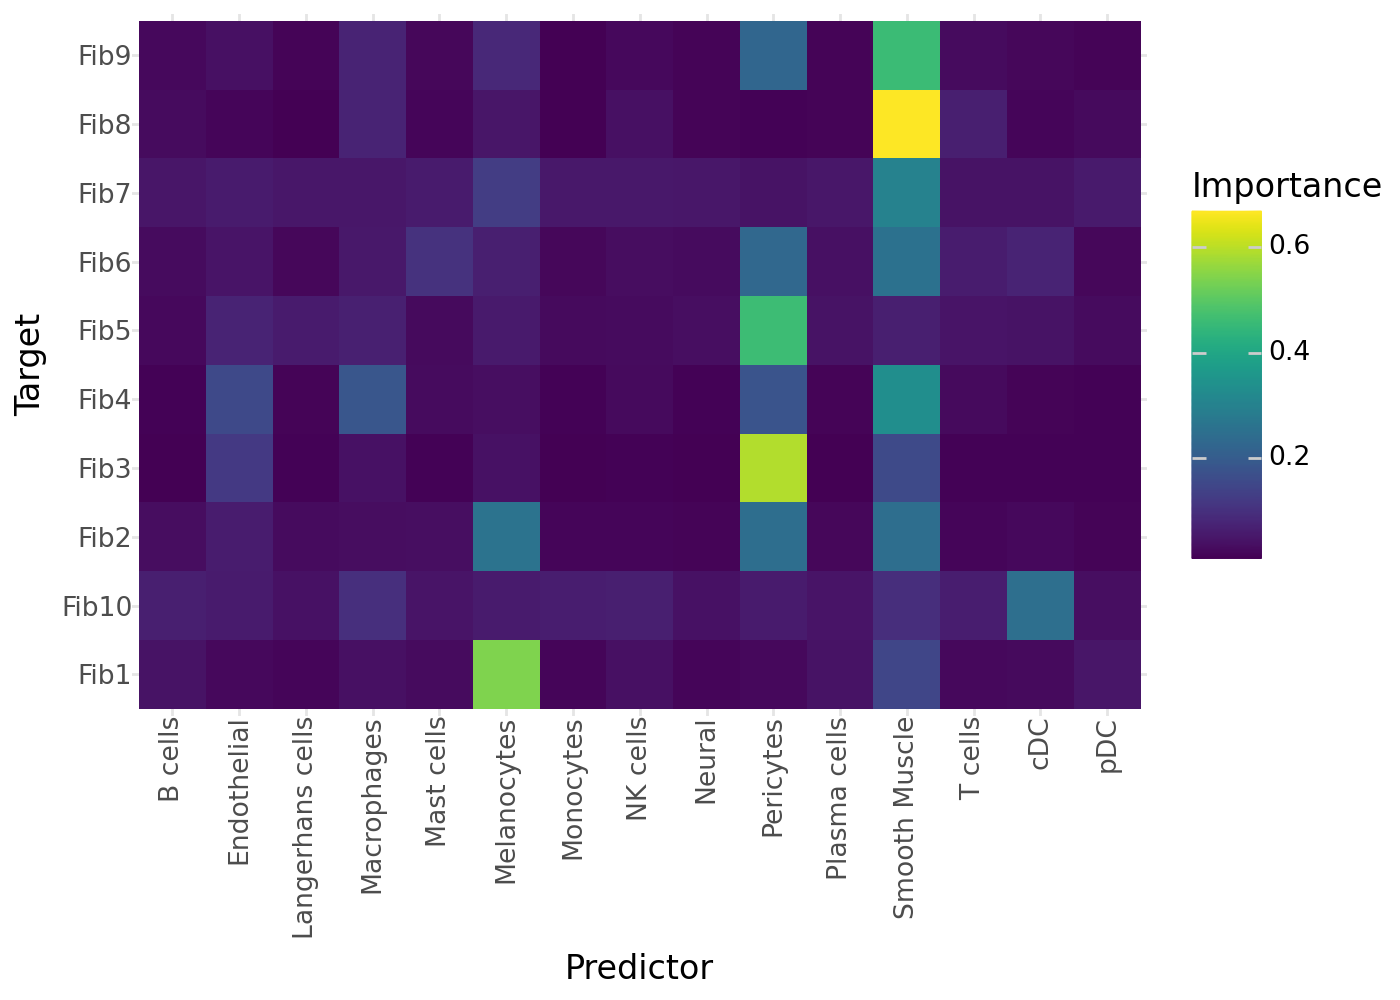

In [20]:
misty = run_misty('SSc-HL05', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


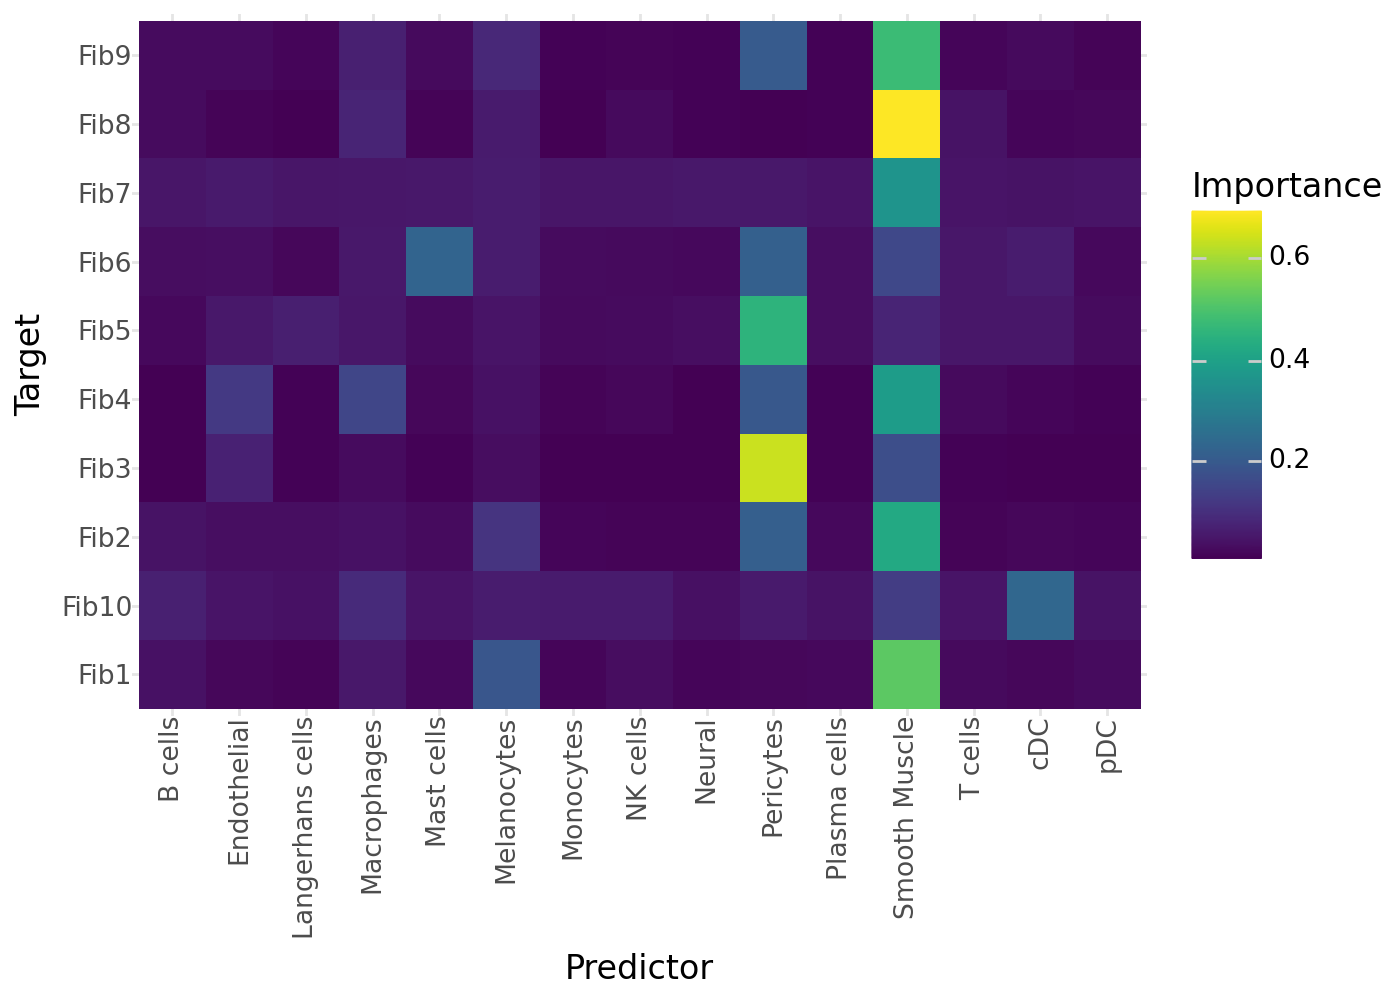

In [21]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


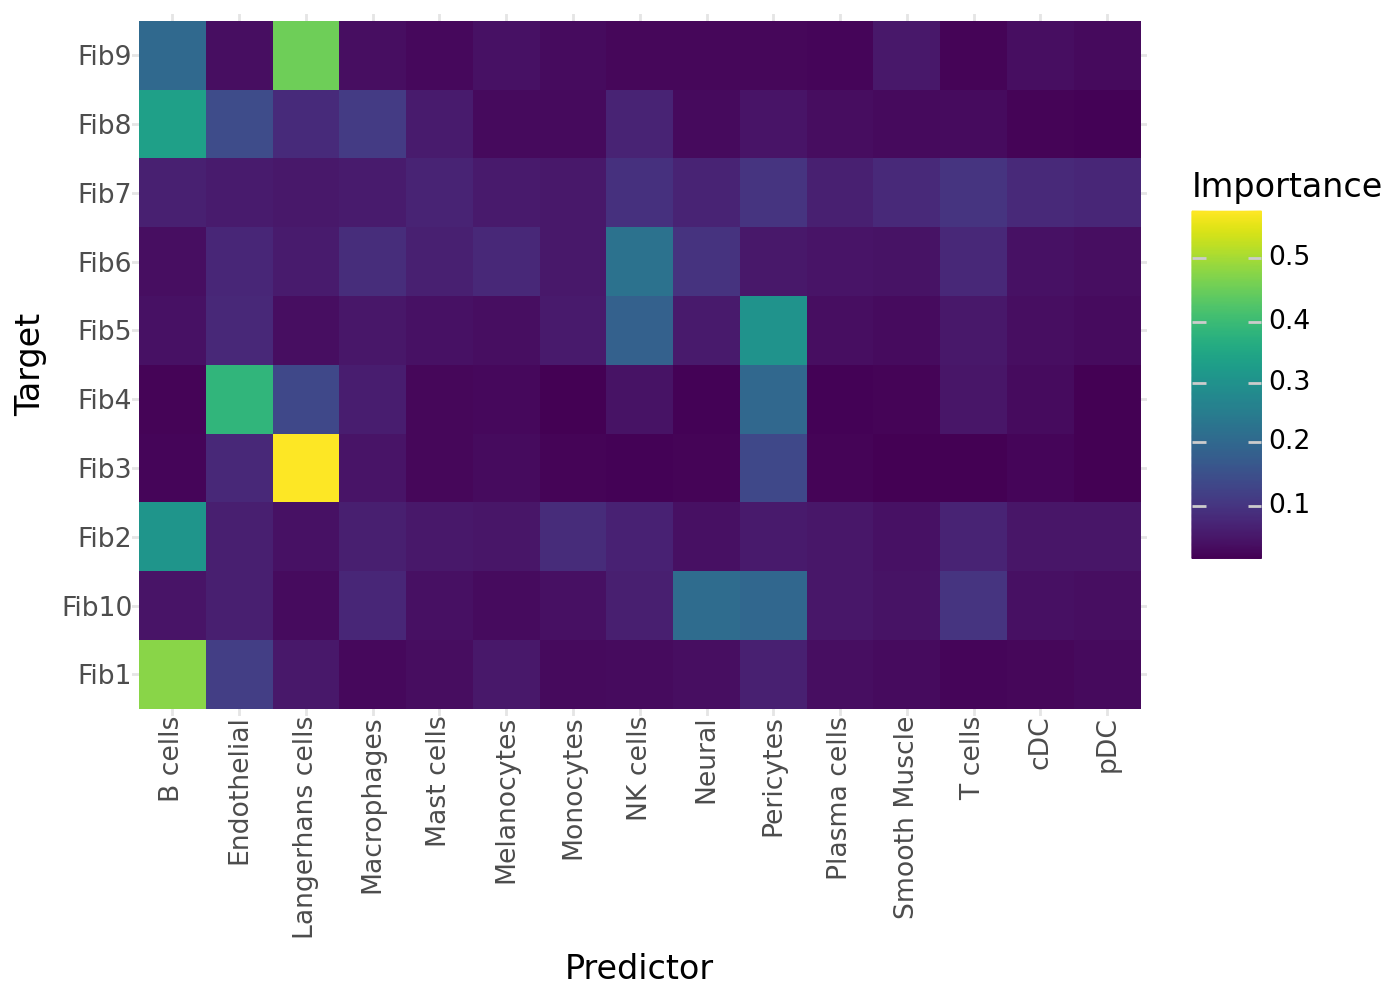

In [22]:
misty = run_misty('SSc-HL06', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


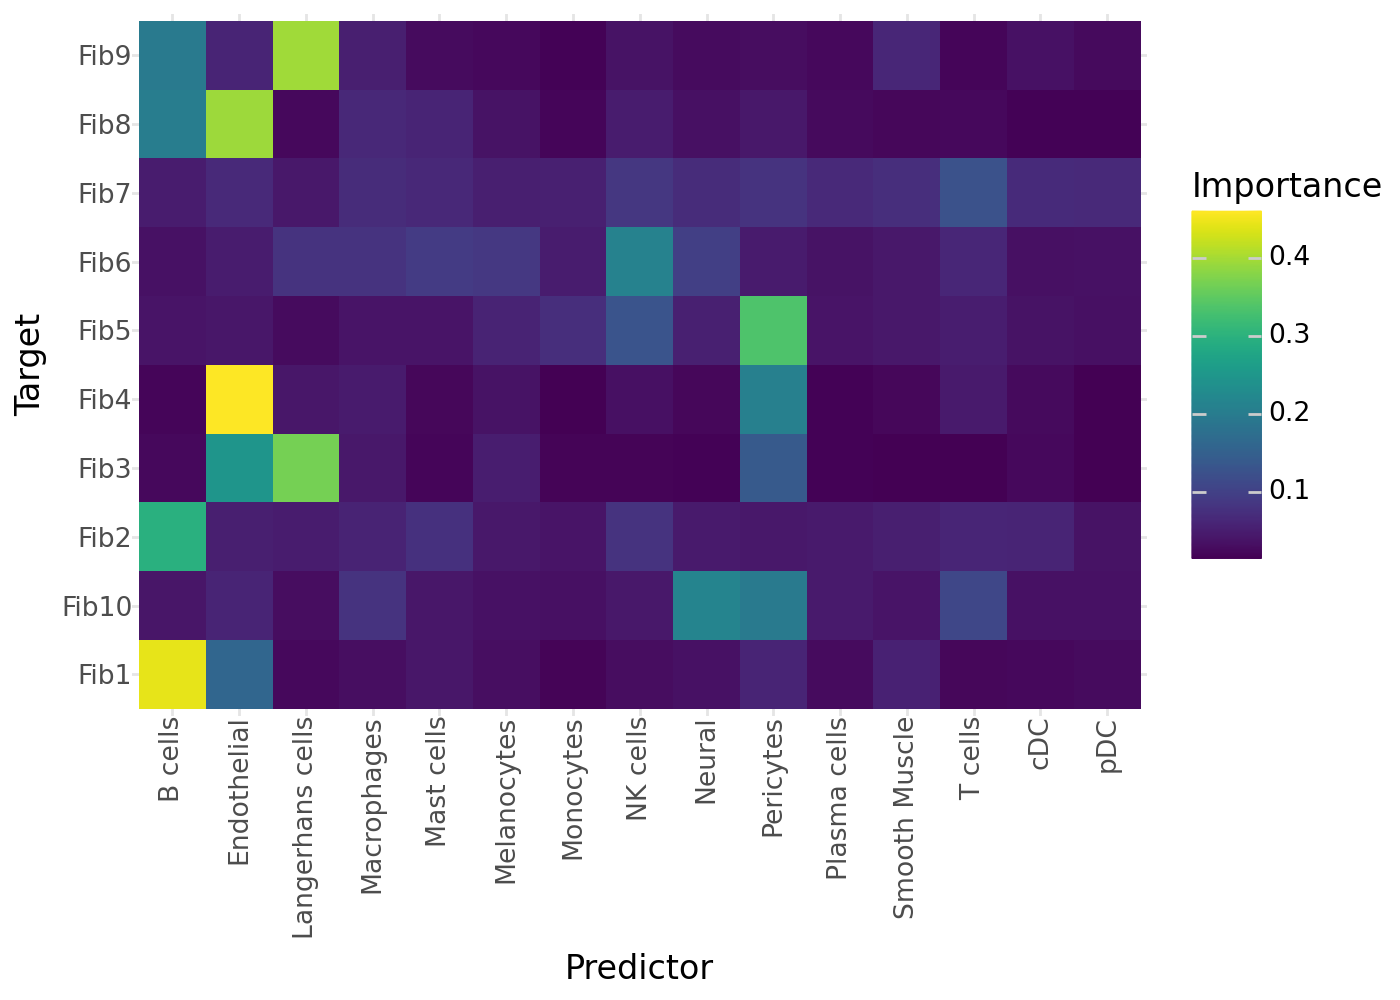

In [23]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


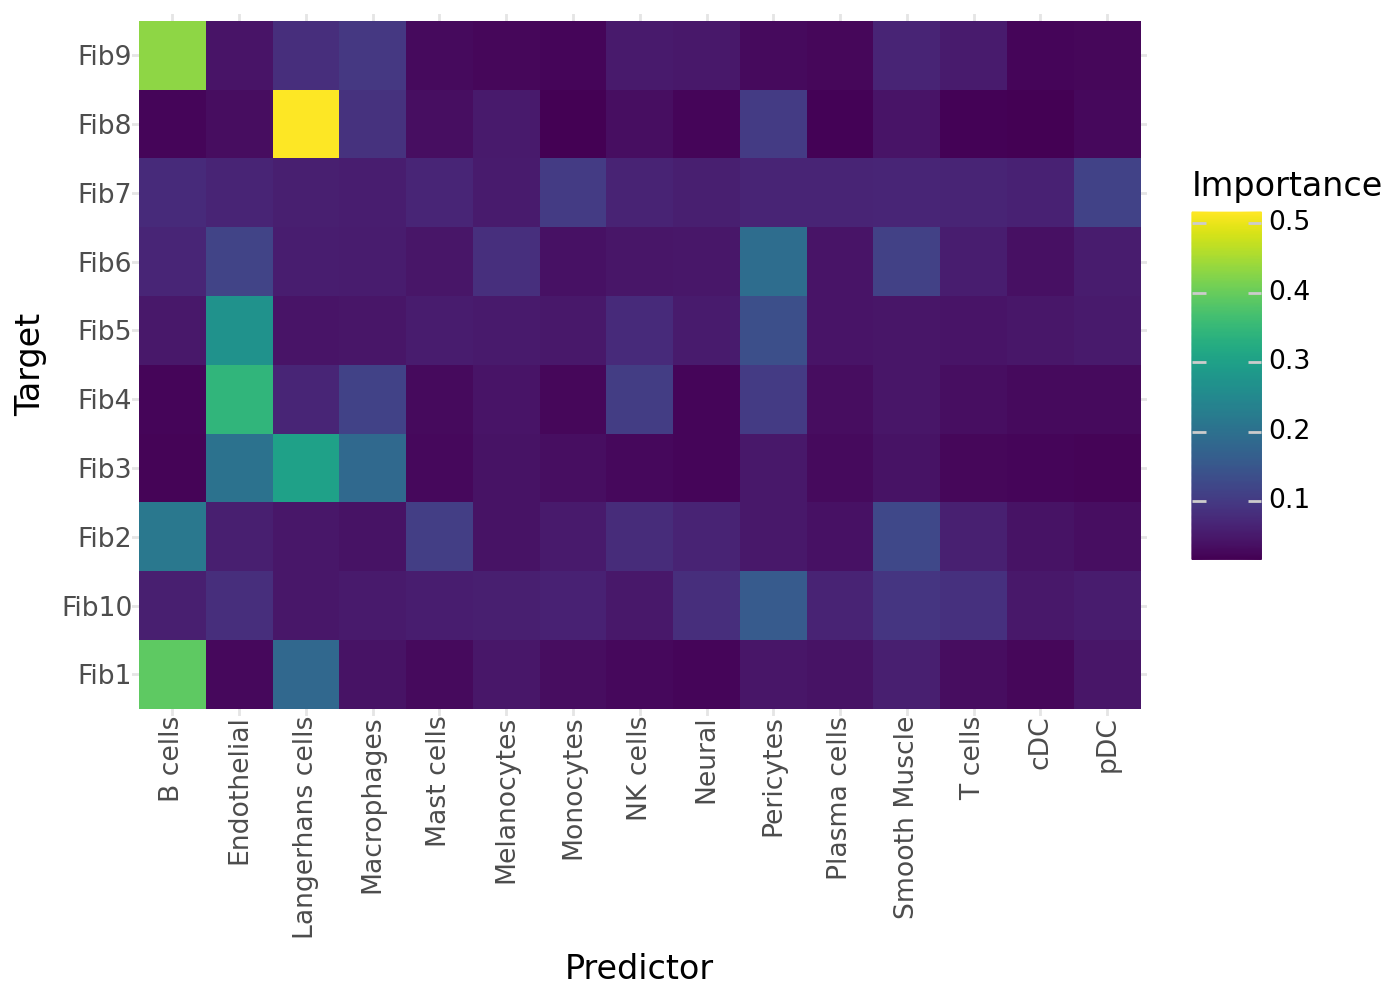

In [24]:
misty = run_misty('SSc-HL11', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


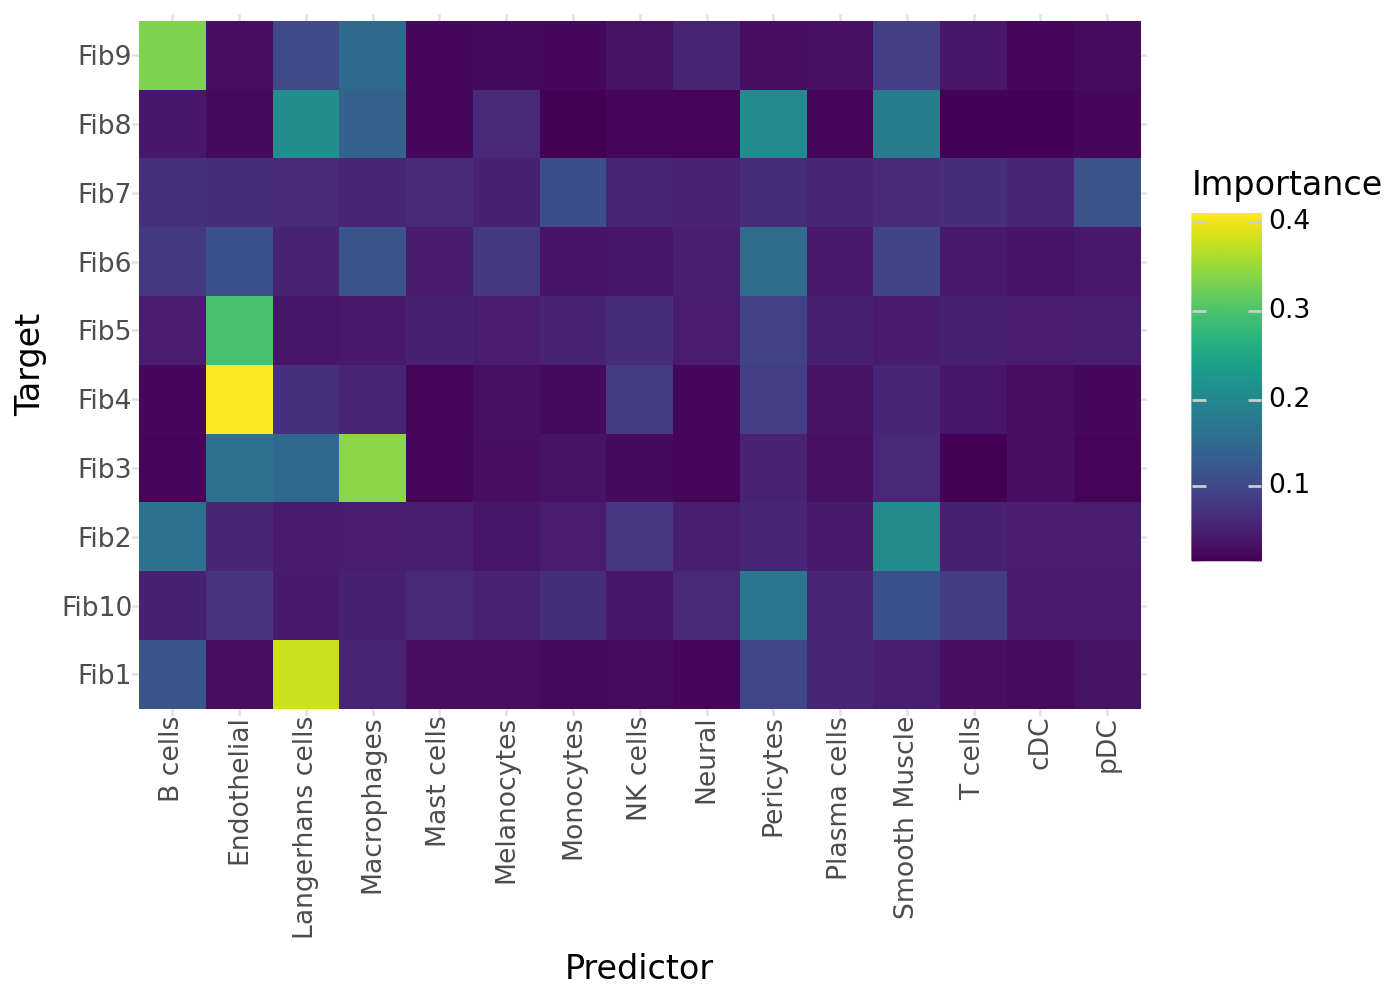

In [25]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


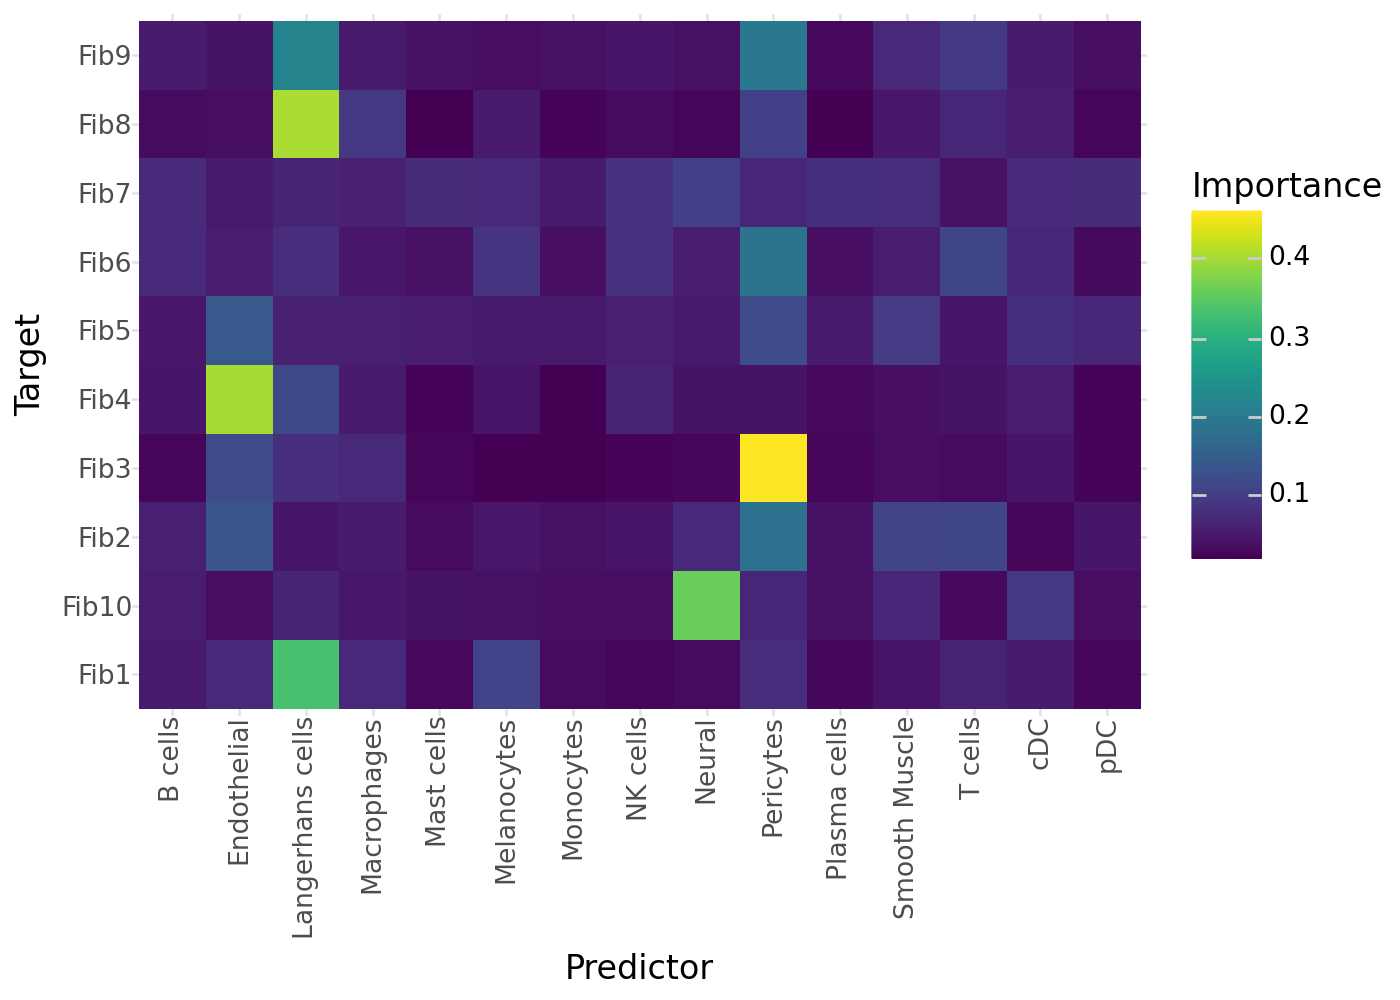

In [26]:
misty = run_misty('SSc-HL13', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


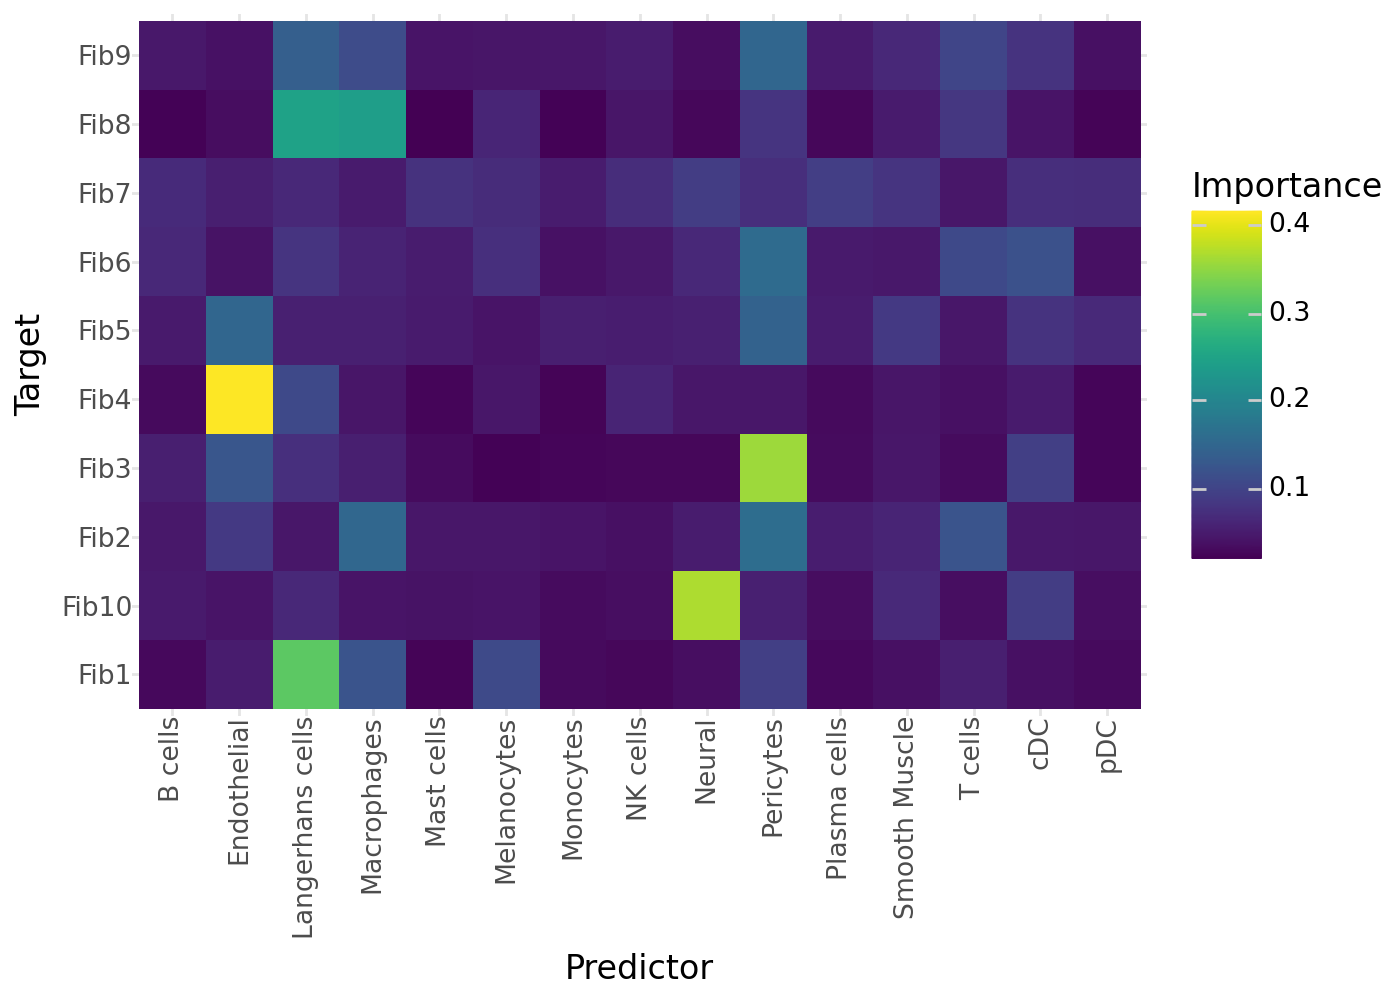

In [27]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


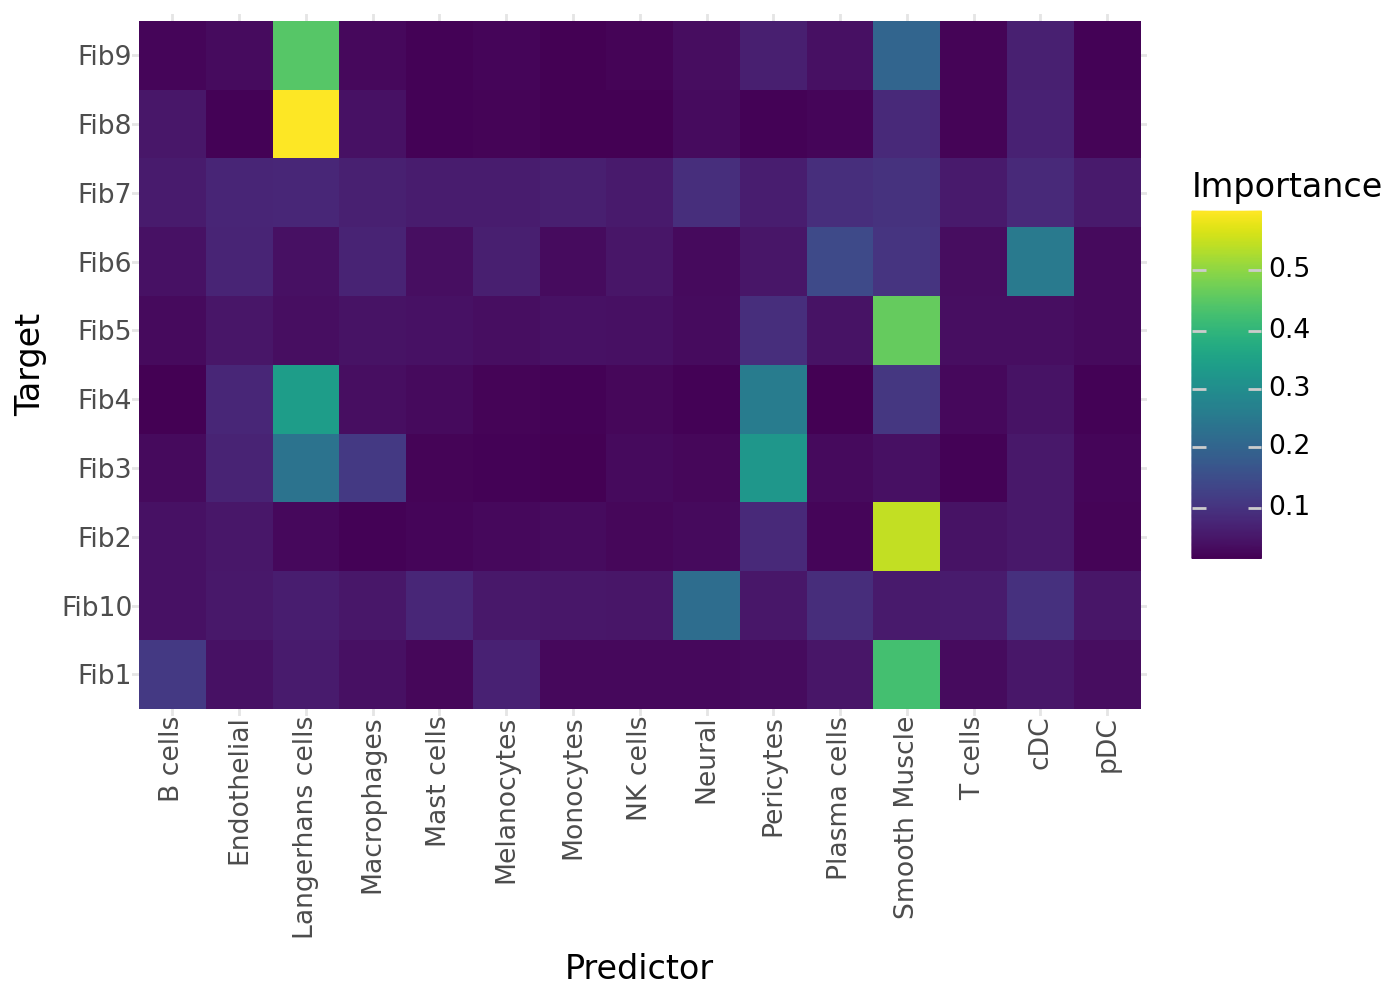

In [28]:
misty = run_misty('SSc-HL25', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


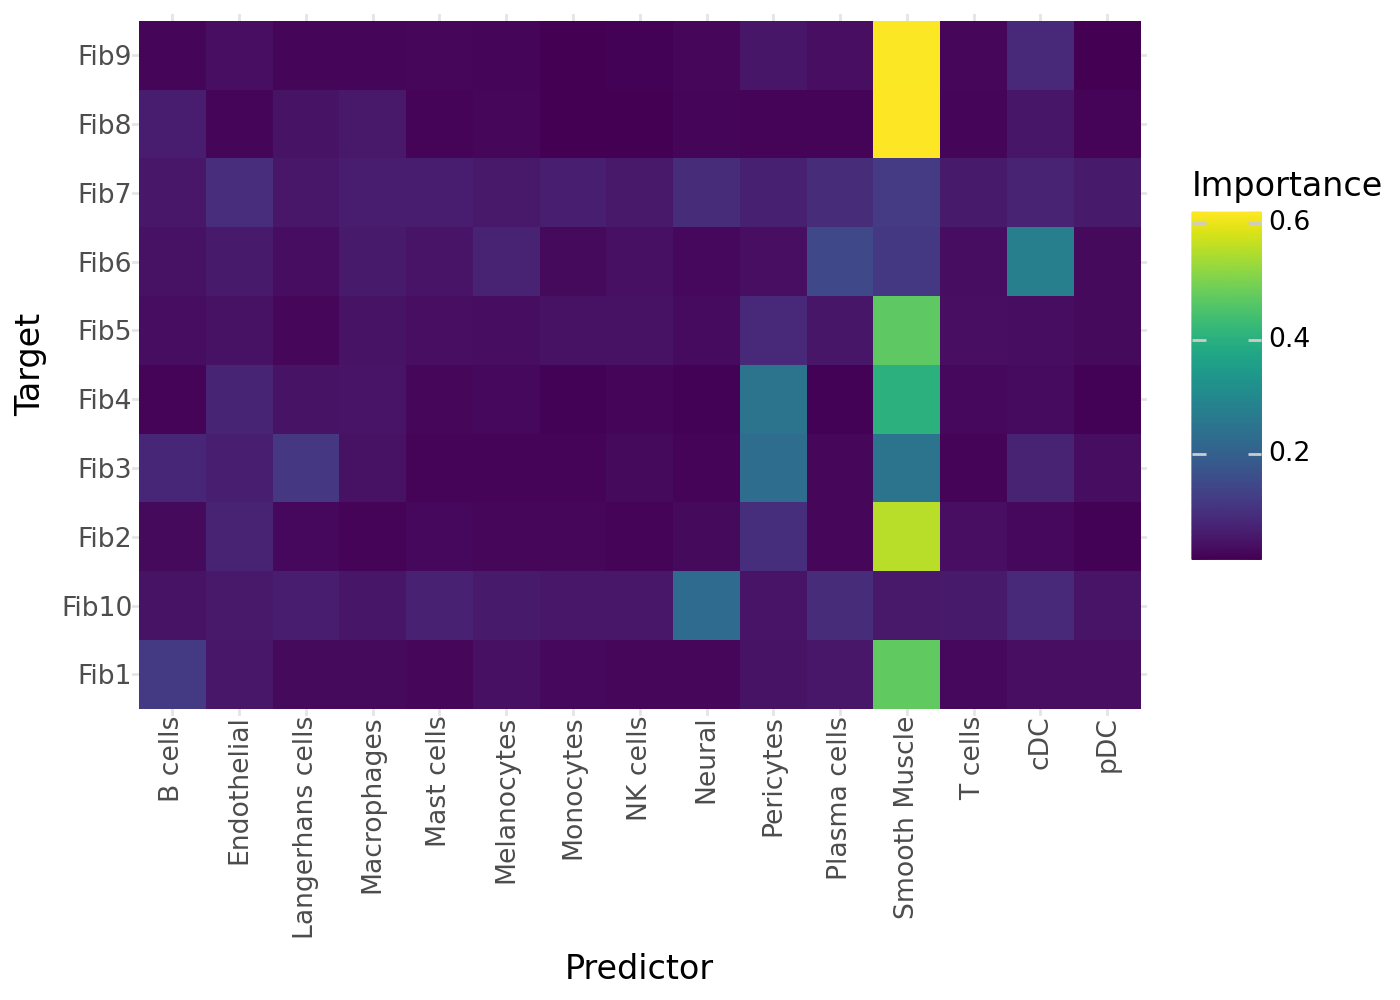

In [29]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.20s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


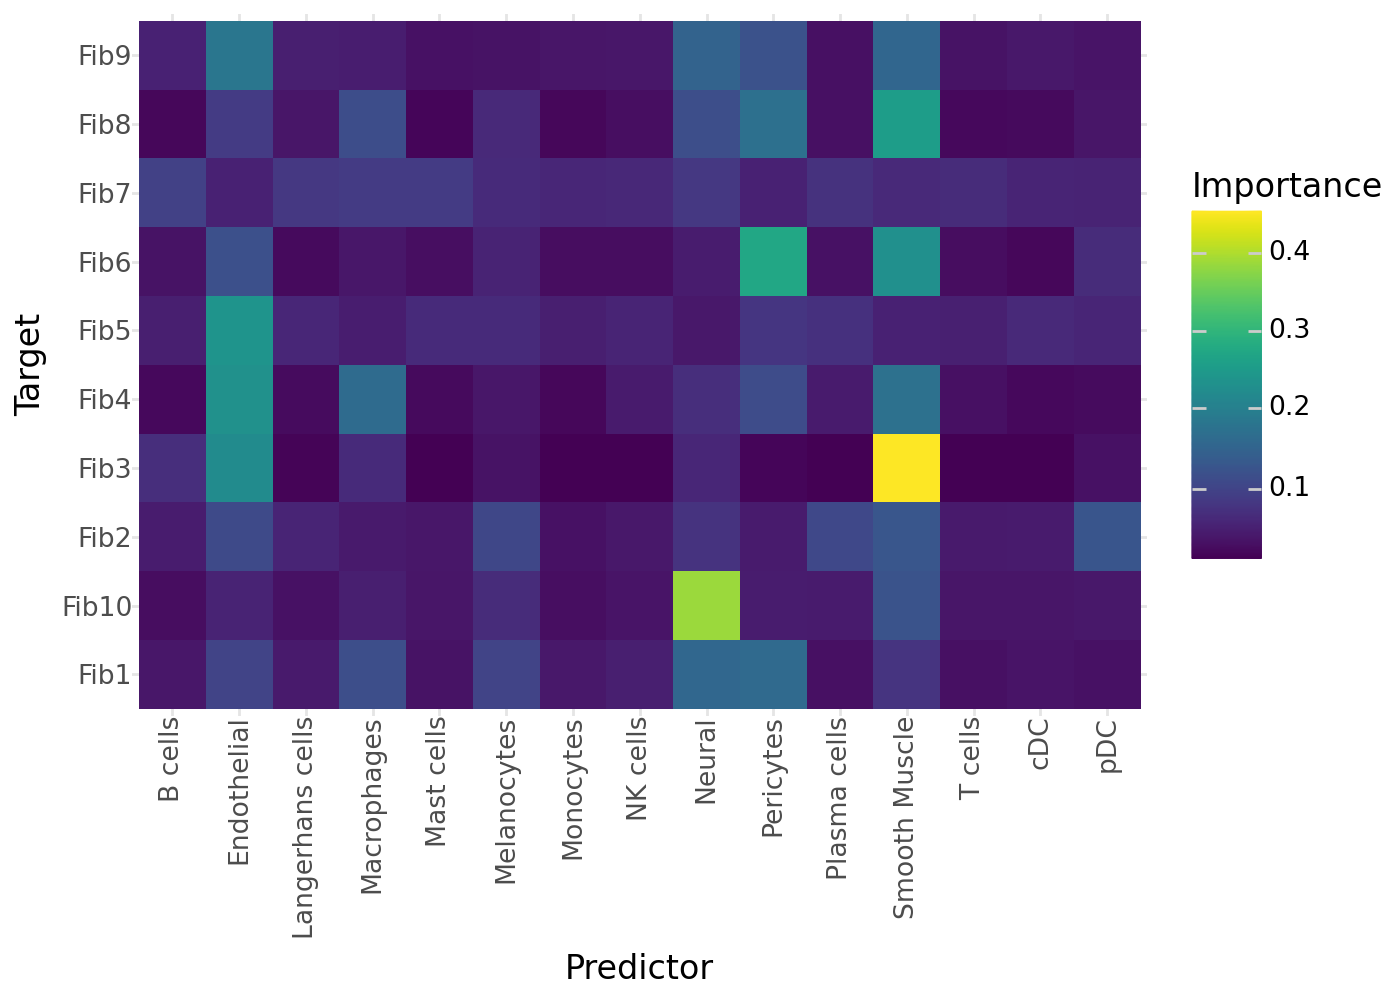

In [30]:
misty = run_misty('SSc-HL33', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


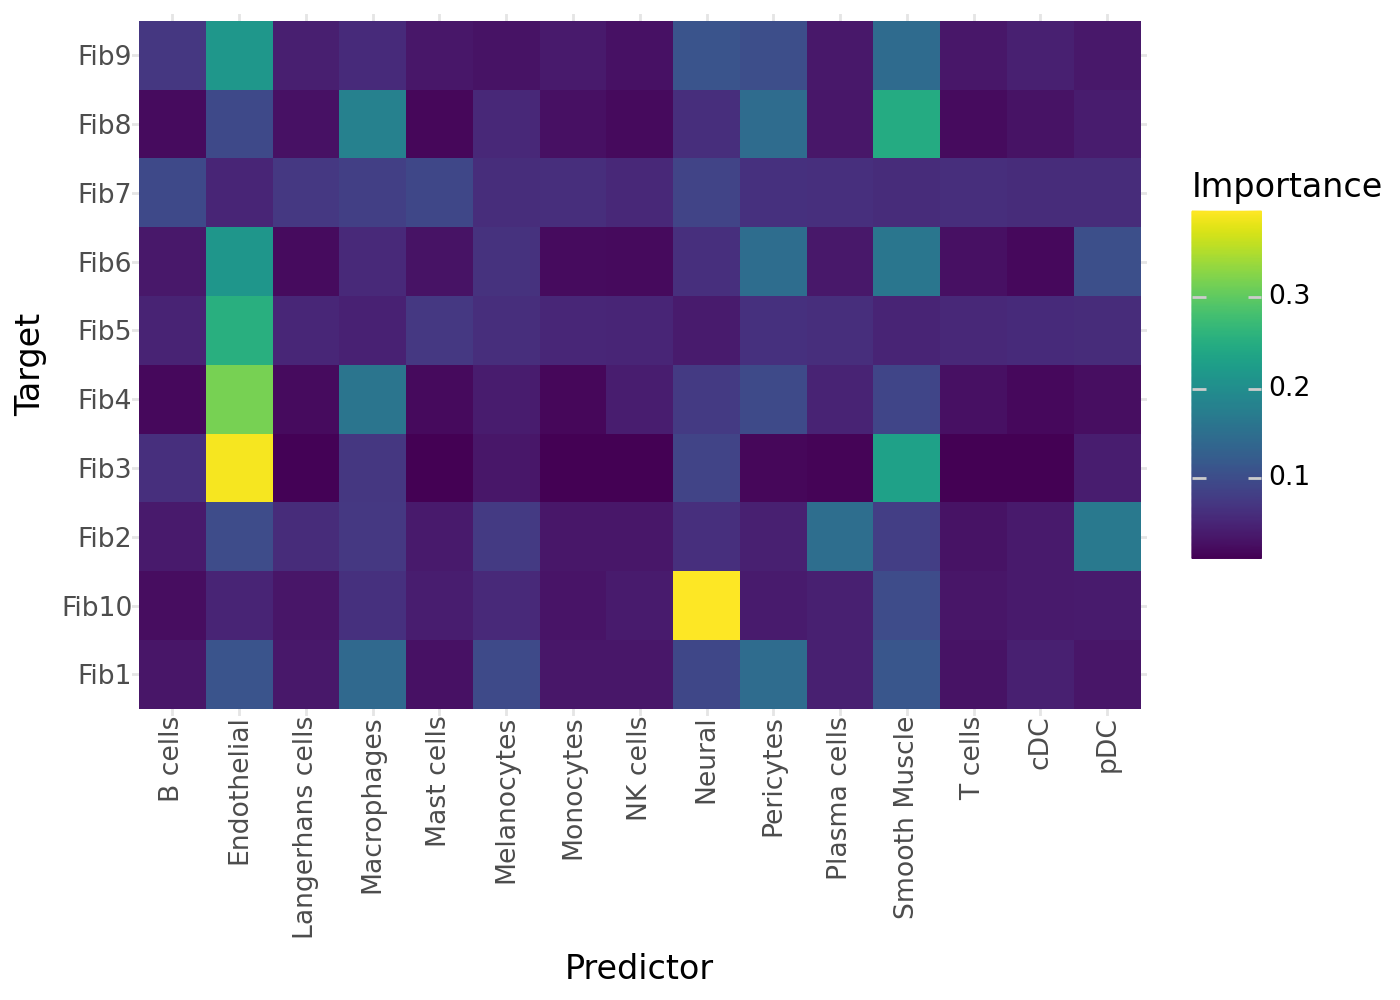

In [31]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))

Now learning: Fib9: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


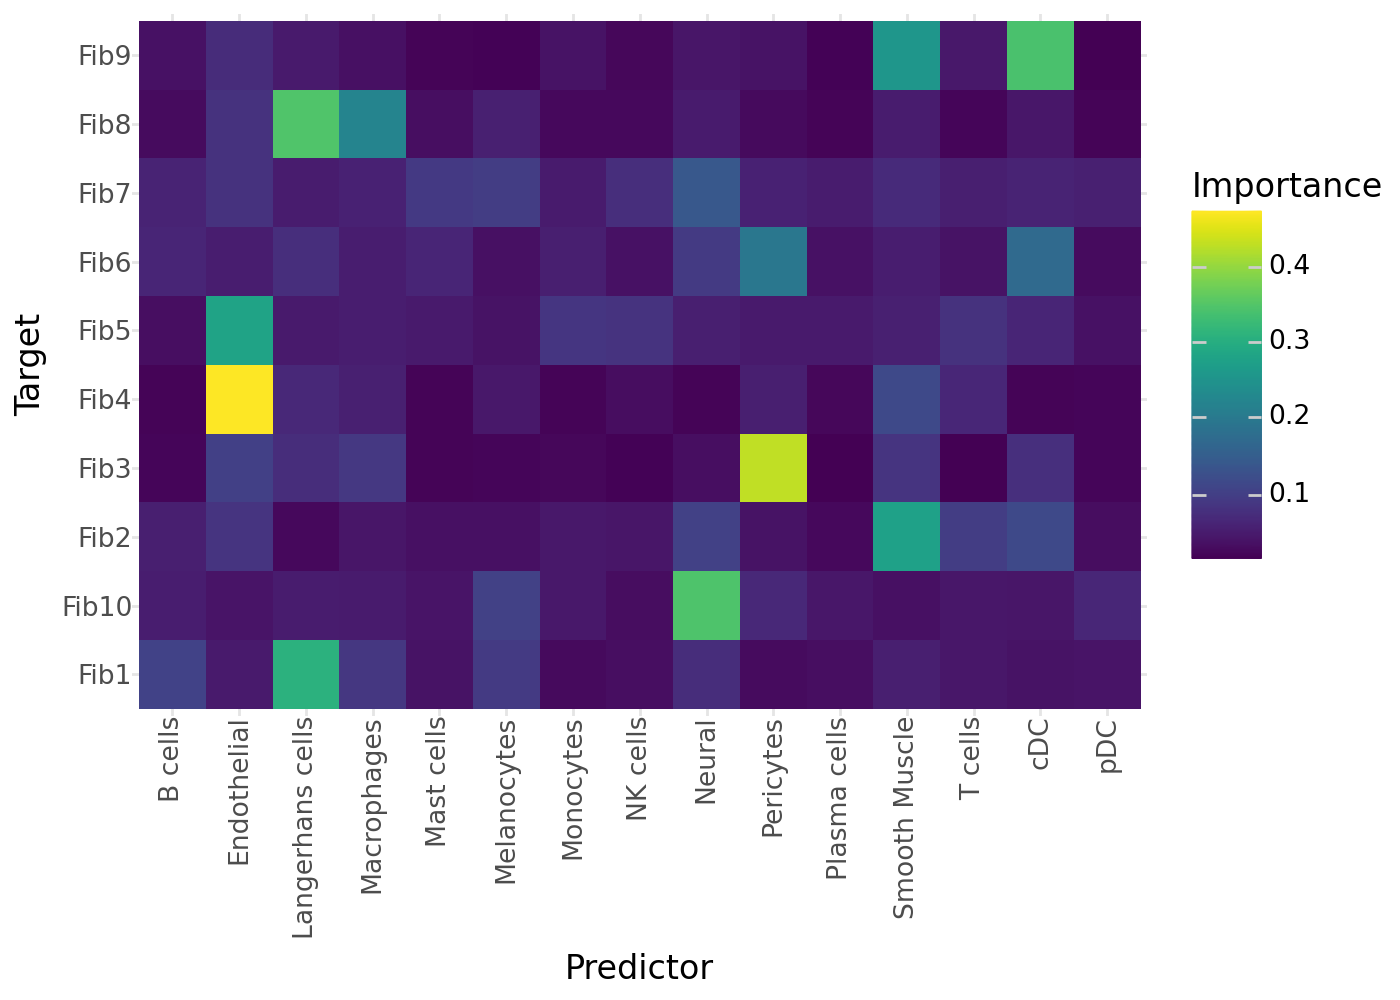

In [32]:
misty = run_misty('SSc-HL35', sel_cell_types, out_dir)
li.pl.interactions(misty, view='juxta', return_fig=True, figure_size=(7,5))

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


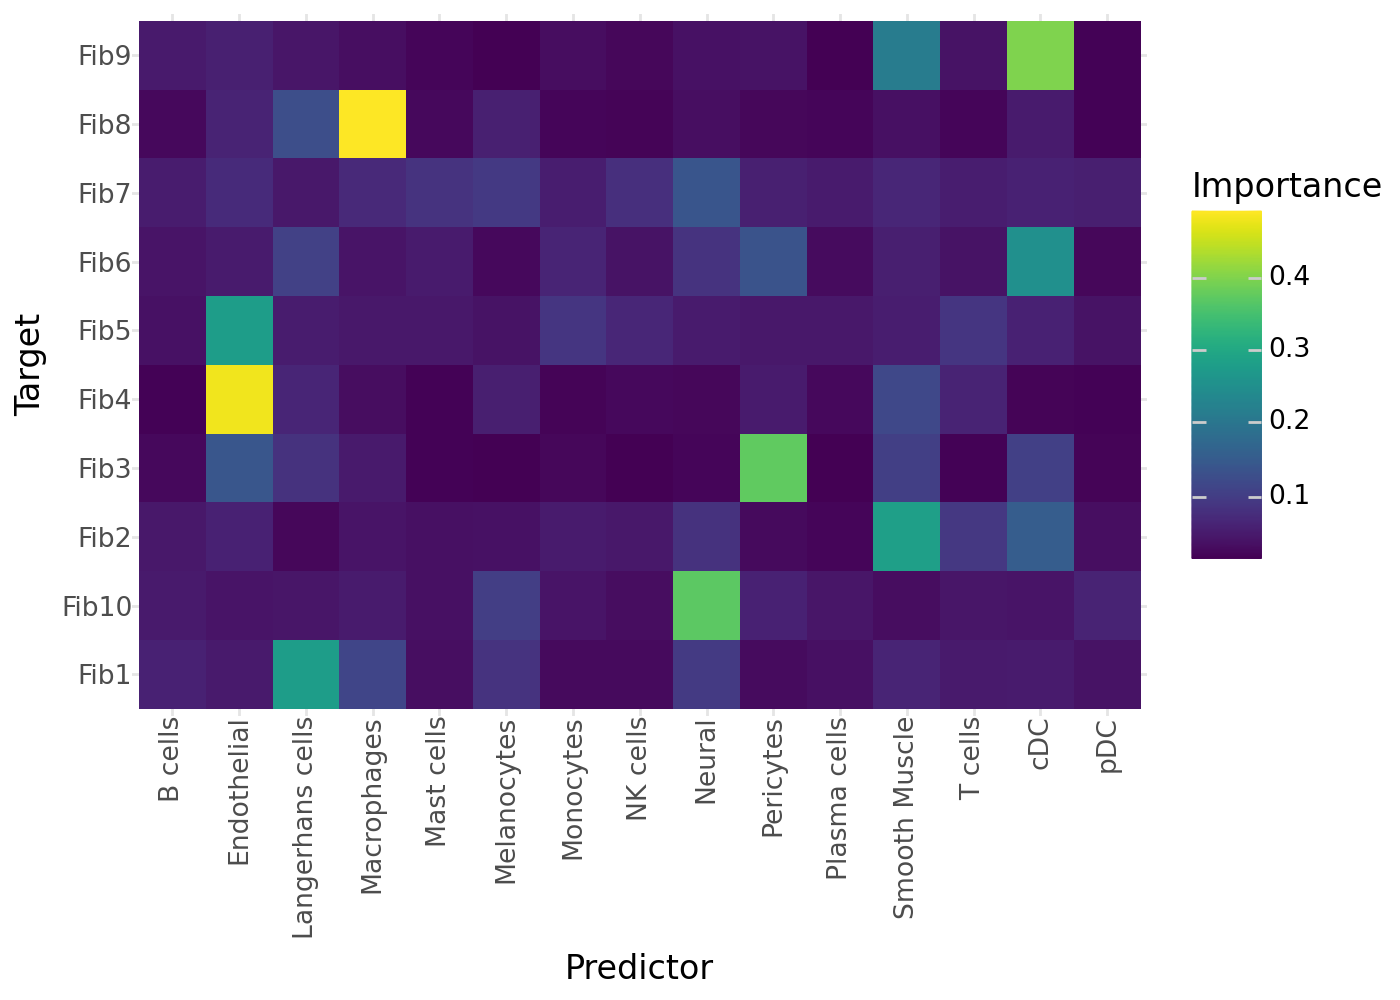

In [33]:
li.pl.interactions(misty, view='para', return_fig=True, figure_size=(7,5))